In [51]:
import pandas as pd
import json
import geopandas as gpd
import numpy as np

from fiona.crs import from_epsg
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [63]:
data_10 = pd.read_csv('C-11.csv')
data_10.head(2)

,Unnamed: 0,Date,Complaint Type,Latitude,Longitude,Location,Incident Zip,Year,Month
0,0,2010-05-10,APPLIANCE,40.809329,-73.922738,"(40.80932936717553, -73.9227384911341)",10454,2010,5
1,1,2010-05-10,APPLIANCE,40.823439,-73.890431,"(40.82343850709147, -73.89043144098281)",10459,2010,5


In [64]:
data_10 = data_10.drop(['Unnamed: 0'], axis = 1)
data_10.head(2)

,Date,Complaint Type,Latitude,Longitude,Location,Incident Zip,Year,Month
0,2010-05-10,APPLIANCE,40.809329,-73.922738,"(40.80932936717553, -73.9227384911341)",10454,2010,5
1,2010-05-10,APPLIANCE,40.823439,-73.890431,"(40.82343850709147, -73.89043144098281)",10459,2010,5


In [65]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_10.Longitude, data_10.Latitude)]
data_10c = data_10.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_10c, crs=crs, geometry=geometry)

In [68]:
data_10c = data_10c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_10c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.92273849109999 40.8093293672),APPLIANCE,2010,5,2010-05-10,"(40.80932936717553, -73.9227384911341)",10454
1,POINT (-73.890431441 40.8234385071),APPLIANCE,2010,5,2010-05-10,"(40.82343850709147, -73.89043144098281)",10459
2,POINT (-73.87414896520001 40.7440688084),PLUMBING,2010,5,2010-05-10,"(40.74406880836881, -73.87414896523073)",11373
3,POINT (-73.8867139892 40.833771517),PLUMBING,2010,5,2010-05-10,"(40.83377151700781, -73.88671398918511)",10460
4,POINT (-73.95693597810001 40.6655359229),PLUMBING,2010,5,2010-05-10,"(40.66553592293138, -73.95693597811109)",11225


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [69]:
data_11 = pd.read_csv('C11.csv')
data_11.head(2)

/Users/achillessaxby/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,Stalled Sites,2011,1,2011-01-12,40.708142,-74.013526,"(40.70814203196457, -74.01352584698965)",10006
1,1,Smoking,2011,1,2011-01-31,40.758870,-73.830130,"(40.75886964114406, -73.83013026118377)",11354


In [70]:
data_11 = data_11.drop(['Unnamed: 0'], axis = 1)
data_11.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Stalled Sites,2011,1,2011-01-12,40.708142,-74.013526,"(40.70814203196457, -74.01352584698965)",10006
1,Smoking,2011,1,2011-01-31,40.758870,-73.830130,"(40.75886964114406, -73.83013026118377)",11354


In [71]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_11.Longitude, data_11.Latitude)]
data_11c = data_11.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_11c, crs=crs, geometry=geometry)

In [72]:
data_11c = data_11c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_11c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-74.013525847 40.708142032),Stalled Sites,2011,1,2011-01-12,"(40.70814203196457, -74.01352584698965)",10006
1,POINT (-73.8301302612 40.7588696411),Smoking,2011,1,2011-01-31,"(40.75886964114406, -73.83013026118377)",11354
2,POINT (-74.0845191507 40.6360970859),Smoking,2011,3,2011-03-03,"(40.636097085879555, -74.0845191507043)",10301
3,POINT (-73.8776629779 40.8841495181),Smoking,2011,3,2011-03-06,"(40.88414951808322, -73.87766297790301)",10467
4,POINT (nan nan),Sewer,2011,5,2011-05-23,NaN,NaN


In [98]:
data_11c = data_11c.dropna()
data_11c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-74.013525847 40.708142032),Stalled Sites,2011,1,2011-01-12,"(40.70814203196457, -74.01352584698965)",10006
1,POINT (-73.8301302612 40.7588696411),Smoking,2011,1,2011-01-31,"(40.75886964114406, -73.83013026118377)",11354
2,POINT (-74.0845191507 40.6360970859),Smoking,2011,3,2011-03-03,"(40.636097085879555, -74.0845191507043)",10301
3,POINT (-73.8776629779 40.8841495181),Smoking,2011,3,2011-03-06,"(40.88414951808322, -73.87766297790301)",10467
5,POINT (-73.96207977649999 40.6083830335),Smoking,2011,6,2011-06-21,"(40.608383033493524, -73.96207977651677)",11223


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [76]:
data_12 = pd.read_csv('C12.csv')
data_12.head(2)

,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,Smoking,2012,1,2012-01-05,40.862122,-73.909221,"(40.86212228992487, -73.90922121571127)",10468
1,1,Non-Residential Heat,2012,1,2012-01-08,40.711077,-73.943806,"(40.711076986346214, -73.94380574345548)",11206


In [77]:
data_12 = data_12.drop(['Unnamed: 0'], axis = 1)
data_12.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Smoking,2012,1,2012-01-05,40.862122,-73.909221,"(40.86212228992487, -73.90922121571127)",10468
1,Non-Residential Heat,2012,1,2012-01-08,40.711077,-73.943806,"(40.711076986346214, -73.94380574345548)",11206


In [78]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_12.Longitude, data_12.Latitude)]
data_12c = data_12.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_12c, crs=crs, geometry=geometry)

In [79]:
data_12c = data_12c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_12c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.9092212157 40.8621222899),Smoking,2012,1,2012-01-05,"(40.86212228992487, -73.90922121571127)",10468
1,POINT (-73.94380574350001 40.7110769863),Non-Residential Heat,2012,1,2012-01-08,"(40.711076986346214, -73.94380574345548)",11206
2,POINT (-73.9616410684 40.7701760655),Smoking,2012,1,2012-01-10,"(40.7701760655427, -73.96164106841557)",10021
3,POINT (-73.88764277040001 40.6539857319),Smoking,2012,1,2012-01-11,"(40.65398573187911, -73.88764277035244)",11207
4,POINT (-73.90006022930001 40.8163823452),General Construction/Plumbing,2012,2,2012-02-22,"(40.81638234521403, -73.90006022932145)",10455


In [99]:
data_12c = data_12c.dropna()
data_12c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.9092212157 40.8621222899),Smoking,2012,1,2012-01-05,"(40.86212228992487, -73.90922121571127)",10468
1,POINT (-73.94380574350001 40.7110769863),Non-Residential Heat,2012,1,2012-01-08,"(40.711076986346214, -73.94380574345548)",11206
2,POINT (-73.9616410684 40.7701760655),Smoking,2012,1,2012-01-10,"(40.7701760655427, -73.96164106841557)",10021
3,POINT (-73.88764277040001 40.6539857319),Smoking,2012,1,2012-01-11,"(40.65398573187911, -73.88764277035244)",11207
4,POINT (-73.90006022930001 40.8163823452),General Construction/Plumbing,2012,2,2012-02-22,"(40.81638234521403, -73.90006022932145)",10455


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [80]:
data_13 = pd.read_csv('C13.csv')
data_13.head(2)

,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,General Construction/Plumbing,2013,10,2013-10-01,40.625374,-73.965276,"(40.6253743118371, -73.96527627658917)",11230
1,1,Smoking,2013,1,2013-01-19,40.763844,-73.936166,"(40.763843628219504, -73.93616597320083)",11106


In [81]:
data_13 = data_13.drop(['Unnamed: 0'], axis = 1)
data_13.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,General Construction/Plumbing,2013,10,2013-10-01,40.625374,-73.965276,"(40.6253743118371, -73.96527627658917)",11230
1,Smoking,2013,1,2013-01-19,40.763844,-73.936166,"(40.763843628219504, -73.93616597320083)",11106


In [82]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_13.Longitude, data_13.Latitude)]
data_13c = data_13.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_13c, crs=crs, geometry=geometry)

In [83]:
data_13c = data_13c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_13c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.96527627659999 40.6253743118),General Construction/Plumbing,2013,10,2013-10-01,"(40.6253743118371, -73.96527627658917)",11230
1,POINT (-73.93616597319999 40.7638436282),Smoking,2013,1,2013-01-19,"(40.763843628219504, -73.93616597320083)",11106
2,POINT (-73.9084504219 40.6762012087),Non-Residential Heat,2013,1,2013-01-23,"(40.67620120872071, -73.90845042192403)",11233
3,POINT (-73.9273324461 40.6712713417),Non-Residential Heat,2013,1,2013-01-25,"(40.67127134171268, -73.92733244608434)",11213
4,POINT (-73.95515536000001 40.7458854768),General Construction/Plumbing,2013,1,2013-01-28,"(40.74588547678187, -73.95515535997583)",11101


In [100]:
data_13c = data_13c.dropna()
data_13c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.96527627659999 40.6253743118),General Construction/Plumbing,2013,10,2013-10-01,"(40.6253743118371, -73.96527627658917)",11230
1,POINT (-73.93616597319999 40.7638436282),Smoking,2013,1,2013-01-19,"(40.763843628219504, -73.93616597320083)",11106
2,POINT (-73.9084504219 40.6762012087),Non-Residential Heat,2013,1,2013-01-23,"(40.67620120872071, -73.90845042192403)",11233
3,POINT (-73.9273324461 40.6712713417),Non-Residential Heat,2013,1,2013-01-25,"(40.67127134171268, -73.92733244608434)",11213
4,POINT (-73.95515536000001 40.7458854768),General Construction/Plumbing,2013,1,2013-01-28,"(40.74588547678187, -73.95515535997583)",11101


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [84]:
data_14 = pd.read_csv('C14.csv')
data_14.head(2)

,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,DOF Property - Reduction Issue,2014,1,2014-01-02,NaN,NaN,NaN,10455
1,1,Blocked Driveway,2014,1,2014-01-01,40.771144,-73.900157,"(40.77114376681425, -73.90015700109045)",11105


In [85]:
data_14 = data_14.drop(['Unnamed: 0'], axis = 1)
data_14.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,DOF Property - Reduction Issue,2014,1,2014-01-02,NaN,NaN,NaN,10455
1,Blocked Driveway,2014,1,2014-01-01,40.771144,-73.900157,"(40.77114376681425, -73.90015700109045)",11105


In [104]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_14.Longitude, data_14.Latitude)]
data_14c = data_14.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_14c, crs=crs, geometry=geometry)

In [105]:
data_14c = data_14c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_14c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (nan nan),DOF Property - Reduction Issue,2014,1,2014-01-02,NaN,10455
1,POINT (-73.9001570011 40.7711437668),Blocked Driveway,2014,1,2014-01-01,"(40.77114376681425, -73.90015700109045)",11105
2,POINT (-73.8359593939 40.6901629701),Blocked Driveway,2014,1,2014-01-01,"(40.69016297012941, -73.83595939389049)",11419
3,POINT (-73.8809651512 40.7041837119),Illegal Parking,2014,1,2014-01-01,"(40.70418371191333, -73.88096515118515)",11385
4,POINT (-73.9970740415 40.6434813927),Noise - Residential,2014,1,2014-01-01,"(40.64348139274596, -73.99707404148495)",11219


In [106]:
data_14c = data_14c.dropna()
data_14c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
1,POINT (-73.9001570011 40.7711437668),Blocked Driveway,2014,1,2014-01-01,"(40.77114376681425, -73.90015700109045)",11105
2,POINT (-73.8359593939 40.6901629701),Blocked Driveway,2014,1,2014-01-01,"(40.69016297012941, -73.83595939389049)",11419
3,POINT (-73.8809651512 40.7041837119),Illegal Parking,2014,1,2014-01-01,"(40.70418371191333, -73.88096515118515)",11385
4,POINT (-73.9970740415 40.6434813927),Noise - Residential,2014,1,2014-01-01,"(40.64348139274596, -73.99707404148495)",11219
5,POINT (-73.9843648372 40.7204657428),Noise - Commercial,2014,1,2014-01-01,"(40.720465742779204, -73.98436483719043)",10002


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [88]:
data_15 = pd.read_csv('C15.csv')
data_15.head(2)

,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.660428,-73.841226,"(40.66042792940118, -73.84122633877455)",11414
1,1,Unsanitary Pigeon Condition,2015,10,2015-10-01,40.665339,-73.978394,"(40.66533884086236, -73.97839415947483)",11215


In [89]:
data_15 = data_15.drop(['Unnamed: 0'], axis = 1)
data_15.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.660428,-73.841226,"(40.66042792940118, -73.84122633877455)",11414
1,Unsanitary Pigeon Condition,2015,10,2015-10-01,40.665339,-73.978394,"(40.66533884086236, -73.97839415947483)",11215


In [90]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_15.Longitude, data_15.Latitude)]
data_15c = data_15.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_15c, crs=crs, geometry=geometry)

In [91]:
data_15c = data_15c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_15c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.8412263388 40.6604279294),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.66042792940118, -73.84122633877455)",11414
1,POINT (-73.9783941595 40.6653388409),Unsanitary Pigeon Condition,2015,10,2015-10-01,"(40.66533884086236, -73.97839415947483)",11215
2,POINT (-74.1052500543 40.6333297),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.63332969998893, -74.10525005425679)",10301
3,POINT (-73.83789200050001 40.6843001236),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.68430012358396, -73.83789200050686)",11417
4,POINT (-73.97858067689999 40.7467815141),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.74678151406556, -73.97858067686367)",10016


In [107]:
data_15c = data_15c.dropna()
data_15c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (-73.8412263388 40.6604279294),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.66042792940118, -73.84122633877455)",11414
1,POINT (-73.9783941595 40.6653388409),Unsanitary Pigeon Condition,2015,10,2015-10-01,"(40.66533884086236, -73.97839415947483)",11215
2,POINT (-74.1052500543 40.6333297),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.63332969998893, -74.10525005425679)",10301
3,POINT (-73.83789200050001 40.6843001236),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.68430012358396, -73.83789200050686)",11417
4,POINT (-73.97858067689999 40.7467815141),Unsanitary Animal Pvt Property,2015,10,2015-10-01,"(40.74678151406556, -73.97858067686367)",10016


#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [113]:
data_1617 = pd.read_csv('C16+.csv')
data_1617.head(2)

,Unnamed: 0,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,0,Blocked Driveway,2017,2,2017-02-03,NaN,NaN,NaN,NaN
1,1,Missed Collection (All Materials),2017,2,2017-02-03,40.708657,-73.958582,"(40.70865688036097, -73.95858173179646)",11211


In [114]:
data_1617 = data_1617.drop(['Unnamed: 0'], axis = 1)
data_1617.head(2)

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Blocked Driveway,2017,2,2017-02-03,NaN,NaN,NaN,NaN
1,Missed Collection (All Materials),2017,2,2017-02-03,40.708657,-73.958582,"(40.70865688036097, -73.95858173179646)",11211


In [115]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_1617.Longitude, data_1617.Latitude)]
data_1617c = data_1617.drop(['Longitude', 'Latitude'], axis=1)
geo_df = GeoDataFrame(data_1617c, crs=crs, geometry=geometry)

In [116]:
data_1617c = data_1617c[['geometry','Complaint Type','Year','Month','Date','Location','Incident Zip']]
data_1617c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,POINT (nan nan),Blocked Driveway,2017,2,2017-02-03,NaN,NaN
1,POINT (-73.95858173180001 40.7086568804),Missed Collection (All Materials),2017,2,2017-02-03,"(40.70865688036097, -73.95858173179646)",11211
2,POINT (-73.785983325 40.7131012992),General Construction/Plumbing,2017,2,2017-02-03,"(40.71310129919592, -73.78598332501407)",11432
3,POINT (nan nan),Traffic Signal Condition,2017,2,2017-02-03,NaN,NaN
4,POINT (-73.8575686196 40.8611643375),Dirty Conditions,2017,2,2017-02-03,"(40.861164337464984, -73.85756861957913)",10469


In [117]:
data_1617c = data_1617c.dropna()
data_1617c.head()

,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
1,POINT (-73.95858173180001 40.7086568804),Missed Collection (All Materials),2017,2,2017-02-03,"(40.70865688036097, -73.95858173179646)",11211
2,POINT (-73.785983325 40.7131012992),General Construction/Plumbing,2017,2,2017-02-03,"(40.71310129919592, -73.78598332501407)",11432
4,POINT (-73.8575686196 40.8611643375),Dirty Conditions,2017,2,2017-02-03,"(40.861164337464984, -73.85756861957913)",10469
6,POINT (-73.9591323831 40.7165098416),Missed Collection (All Materials),2017,2,2017-02-03,"(40.71650984162058, -73.95913238306075)",11211
7,POINT (-73.9630646918 40.715964963),Missed Collection (All Materials),2017,2,2017-02-03,"(40.71596496297208, -73.96306469182862)",11249


In [123]:
data_1617c = data_1617c.reset_index()
data_1617c.head()

,index,geometry,Complaint Type,Year,Month,Date,Location,Incident Zip
0,1,POINT (-73.95858173180001 40.7086568804),Missed Collection (All Materials),2017,2,2017-02-03,"(40.70865688036097, -73.95858173179646)",11211
1,2,POINT (-73.785983325 40.7131012992),General Construction/Plumbing,2017,2,2017-02-03,"(40.71310129919592, -73.78598332501407)",11432
2,4,POINT (-73.8575686196 40.8611643375),Dirty Conditions,2017,2,2017-02-03,"(40.861164337464984, -73.85756861957913)",10469
3,6,POINT (-73.9591323831 40.7165098416),Missed Collection (All Materials),2017,2,2017-02-03,"(40.71650984162058, -73.95913238306075)",11211
4,7,POINT (-73.9630646918 40.715964963),Missed Collection (All Materials),2017,2,2017-02-03,"(40.71596496297208, -73.96306469182862)",11249


In [144]:
data_1617c = data_1617c.drop(['index'], axis = 1)
data_1617c.head()

ValueError: labels ['index'] not contained in axis

In [ ]:
data_1617c

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
loc_3 = gpd.read_file('linknyc_locations.geojson')
loc_3.head()

,boro,boro_id,cartodb_id,cb_link_id,community_board,geometry,kiosk_bearing,latitude,link_installation_a,link_installation_status,link_site_id,link_smoke_tested_and_activated_a,location,longitude,smallest_ppt,street_address
0,Manhattan,NY-MN,317,LINK-001680,109,"POLYGON ((-73.95304299999999 40.820754, -73.95...",112 E,40.820770,06/17/2016,A - Link Live,mn-09-120365,7/7/16,"(40.820770000000003, -73.954820999999995)",-73.954821,120365,3359 Broadway
1,Manhattan,NY-MN,432,LINK-006039,112,"POLYGON ((-73.939961 40.833431, -73.94 40.8331...",,40.833447,07/15/2016,A - Link Live,mn-12-120460,7/21/16,"(40.833447, -73.941739999999996)",-73.941740,120460,1976 AMSTERDAM AVE
2,Manhattan,NY-MN,249,LINK-000922,107,"POLYGON ((-73.980705 40.769813, -73.980743 40....",344 N,40.769829,04/30/2016,A - Link Live,mn-07-133518,9/30/16,"(40.769829000000001, -73.982482000000005)",-73.982482,133518,1855 BROADWAY
3,Manhattan,NY-MN,293,LINK-001484,107,"POLYGON ((-73.972989 40.790037, -73.973028 40....",17 N,40.790053,06/24/2016,A - Link Live,mn-07-133391,10/25/16,"(40.790053, -73.974767)",-73.974767,133391,216 West 89st
4,Brooklyn,NY-BK,1,LINK-000045,302,"POLYGON ((-73.978838 40.688835, -73.978876 40....",320 NW,40.688851,11/13/2016,A - Link Live,bk-02-126565,1/20/17,"(40.688851, -73.980613000000005)",-73.980613,126565,395 Flatbush Avenue


In [32]:
loc = loc_3
loc.head()

,boro,boro_id,cartodb_id,cb_link_id,community_board,geometry,kiosk_bearing,latitude,link_installation_a,link_installation_status,link_site_id,link_smoke_tested_and_activated_a,location,longitude,smallest_ppt,street_address
0,Manhattan,NY-MN,317,LINK-001680,109,"POLYGON ((-73.95304299999999 40.820754, -73.95...",112 E,40.820770,06/17/2016,A - Link Live,mn-09-120365,7/7/16,"(40.820770000000003, -73.954820999999995)",-73.954821,120365,3359 Broadway
1,Manhattan,NY-MN,432,LINK-006039,112,"POLYGON ((-73.939961 40.833431, -73.94 40.8331...",,40.833447,07/15/2016,A - Link Live,mn-12-120460,7/21/16,"(40.833447, -73.941739999999996)",-73.941740,120460,1976 AMSTERDAM AVE
2,Manhattan,NY-MN,249,LINK-000922,107,"POLYGON ((-73.980705 40.769813, -73.980743 40....",344 N,40.769829,04/30/2016,A - Link Live,mn-07-133518,9/30/16,"(40.769829000000001, -73.982482000000005)",-73.982482,133518,1855 BROADWAY
3,Manhattan,NY-MN,293,LINK-001484,107,"POLYGON ((-73.972989 40.790037, -73.973028 40....",17 N,40.790053,06/24/2016,A - Link Live,mn-07-133391,10/25/16,"(40.790053, -73.974767)",-73.974767,133391,216 West 89st
4,Brooklyn,NY-BK,1,LINK-000045,302,"POLYGON ((-73.978838 40.688835, -73.978876 40....",320 NW,40.688851,11/13/2016,A - Link Live,bk-02-126565,1/20/17,"(40.688851, -73.980613000000005)",-73.980613,126565,395 Flatbush Avenue


In [33]:
loc.columns

Index([                             u'boro',
                                 u'boro_id',
                              u'cartodb_id',
                              u'cb_link_id',
                         u'community_board',
                                u'geometry',
                           u'kiosk_bearing',
                                u'latitude',
                     u'link_installation_a',
                u'link_installation_status',
                            u'link_site_id',
       u'link_smoke_tested_and_activated_a',
                                u'location',
                               u'longitude',
                            u'smallest_ppt',
                          u'street_address'],
      dtype='object')

In [34]:
loc = loc.drop([u'boro', u'boro_id',u'cartodb_id', u'community_board', u'kiosk_bearing', u'link_installation_a',
                u'link_installation_status', u'link_site_id', u'link_smoke_tested_and_activated_a', 
                u'smallest_ppt', u'street_address'], axis = 1)
loc.head()

,cb_link_id,geometry,latitude,location,longitude
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",40.820770,"(40.820770000000003, -73.954820999999995)",-73.954821
1,LINK-006039,"POLYGON ((-73.939961 40.833431, -73.94 40.8331...",40.833447,"(40.833447, -73.941739999999996)",-73.941740
2,LINK-000922,"POLYGON ((-73.980705 40.769813, -73.980743 40....",40.769829,"(40.769829000000001, -73.982482000000005)",-73.982482
3,LINK-001484,"POLYGON ((-73.972989 40.790037, -73.973028 40....",40.790053,"(40.790053, -73.974767)",-73.974767
4,LINK-000045,"POLYGON ((-73.978838 40.688835, -73.978876 40....",40.688851,"(40.688851, -73.980613000000005)",-73.980613


In [35]:
loc = loc.drop(['latitude', 'longitude', 'location'], axis = 1)
loc.head()

,cb_link_id,geometry
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95..."
1,LINK-006039,"POLYGON ((-73.939961 40.833431, -73.94 40.8331..."
2,LINK-000922,"POLYGON ((-73.980705 40.769813, -73.980743 40...."
3,LINK-001484,"POLYGON ((-73.972989 40.790037, -73.973028 40...."
4,LINK-000045,"POLYGON ((-73.978838 40.688835, -73.978876 40...."


In [36]:
loc_crs = loc.to_crs(epsg=4326)
loc_crs.head()

,cb_link_id,geometry
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95..."
1,LINK-006039,"POLYGON ((-73.939961 40.833431, -73.94 40.8331..."
2,LINK-000922,"POLYGON ((-73.980705 40.769813, -73.980743 40...."
3,LINK-001484,"POLYGON ((-73.972989 40.790037, -73.973028 40...."
4,LINK-000045,"POLYGON ((-73.978838 40.688835, -73.978876 40...."


In [139]:
loc_crs.shape

(550, 2)

In [161]:
data_10c.shape

(2005757, 7)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Spatial Joining Each Year to LinkNYC Locations
- Identify for Control in Manhattan as well to check general trend

#### 2011 - 311 Types Count

In [164]:
data_11c.crs = from_epsg(4326)

In [165]:
data_2011 = gpd.sjoin(loc_crs, data_11c)
data_2011.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1575094,NONCONST,2011,10,2011-10-27,"(40.82055085252408, -73.9561130670567)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",1575094,NONCONST,2011,10,2011-10-27,"(40.82055085252408, -73.9561130670567)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1543644,PLUMBING,2011,10,2011-10-22,"(40.82055085252408, -73.9561130670567)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",1543644,PLUMBING,2011,10,2011-10-22,"(40.82055085252408, -73.9561130670567)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1544759,PLUMBING,2011,10,2011-10-22,"(40.82055085252408, -73.9561130670567)",10031


In [329]:
count_2011 = data_2011.groupby('Complaint Type').count()

In [330]:
count_2011.reset_index(inplace=True)

In [331]:
count_2011.rename(columns={'geometry' : 'count'}, inplace=True)

In [332]:
count_2011 = count_2011[['Complaint Type', 'count']]

In [334]:
count_2011_final = count_2011.sort_values(by='count', ascending=False)
count_2011_final.head()

,Complaint Type,count
52,HEATING,39211
86,Noise - Residential,22411
125,Street Condition,22114
49,GENERAL CONSTRUCTION,21332
97,PLUMBING,19003


In [360]:
count_2011_final.rename(columns={'count':'Count_11'}, inplace = True)
count_2011_final.head()

,Complaint Type,Count_11
52,HEATING,39211
86,Noise - Residential,22411
125,Street Condition,22114
49,GENERAL CONSTRUCTION,21332
97,PLUMBING,19003


In [265]:
data_11.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Stalled Sites,2011,1,2011-01-12,40.708142,-74.013526,"(40.70814203196457, -74.01352584698965)",10006
1,Smoking,2011,1,2011-01-31,40.758870,-73.830130,"(40.75886964114406, -73.83013026118377)",11354
2,Smoking,2011,3,2011-03-03,40.636097,-74.084519,"(40.636097085879555, -74.0845191507043)",10301
3,Smoking,2011,3,2011-03-06,40.884150,-73.877663,"(40.88414951808322, -73.87766297790301)",10467
4,Sewer,2011,5,2011-05-23,NaN,NaN,NaN,NaN


In [266]:
data_11_count = data_11.groupby('Complaint Type').count()

In [267]:
data_11_count.reset_index(inplace=True)

In [268]:
data_11_count.rename(columns={'Year' : 'count'}, inplace=True)

In [269]:
data_11_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,APPLIANCE,13601,13601,13601,13591,13591,13591,13591
1,Adopt-A-Basket,25,25,25,24,24,24,24
2,Agency Issues,222,222,222,0,0,0,0
3,Air Quality,6405,6405,6405,6067,6067,6067,6069
4,Alzheimer's Care,401,401,401,0,0,0,362
5,Animal Facility - No Permit,69,69,69,69,69,69,69
6,Animal in a Park,1614,1614,1614,397,397,397,1586
7,Asbestos,1977,1977,1977,1949,1949,1949,1949
8,BEST/Site Safety,907,907,907,889,889,889,889
9,Beach/Pool/Sauna Complaint,154,154,154,153,153,153,153


In [325]:
data_11_count = data_11_count[['Complaint Type', 'count']]

In [326]:
data_11_final = data_11_count.sort_values(by='count', ascending=False)

In [327]:
data_11_final.rename(columns={'count': 'Count_11'}, inplace=True)
data_11_final.head()

,Complaint Type,Count_11
90,HEATING,189621
86,GENERAL CONSTRUCTION,133168
151,PLUMBING,113105
138,Noise - Residential,111447
188,Street Condition,104694


#### ------------------------------------------

#### 2012 Data
- Control Group 
- 311 Spatially Joined Dataset

In [183]:
data_12c.crs = from_epsg(4326)

In [184]:
data_2012 = gpd.sjoin(loc_crs, data_12c)
data_2012.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",261197,HEATING,2012,1,2012-01-16,"(40.82057009851683, -73.95619976604452)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",261197,HEATING,2012,1,2012-01-16,"(40.82057009851683, -73.95619976604452)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",428680,ELECTRIC,2012,2,2012-02-22,"(40.82057009851683, -73.95619976604452)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",428680,ELECTRIC,2012,2,2012-02-22,"(40.82057009851683, -73.95619976604452)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",429005,GENERAL CONSTRUCTION,2012,2,2012-02-22,"(40.82057009851683, -73.95619976604452)",10031


In [336]:
count_2012 = data_2012.groupby('Complaint Type').count()

In [337]:
count_2012.reset_index(inplace=True)

In [338]:
count_2012.rename(columns={'geometry' : 'count'}, inplace=True)

In [339]:
count_2012 = count_2012[['Complaint Type', 'count']]

In [340]:
count_2012_final = count_2012.sort_values(by='count', ascending=False)
count_2012_final.head()

,Complaint Type,count
54,HEATING,36462
82,Noise - Residential,23776
51,GENERAL CONSTRUCTION,19632
13,Broken Muni Meter,16513
77,Noise,16202


In [361]:
count_2012_final.rename(columns={'count':'Count_12'}, inplace = True)
count_2012_final.head()

,Complaint Type,Count_12
54,HEATING,36462
82,Noise - Residential,23776
51,GENERAL CONSTRUCTION,19632
13,Broken Muni Meter,16513
77,Noise,16202


In [190]:
data_12.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Smoking,2012,1,2012-01-05,40.862122,-73.909221,"(40.86212228992487, -73.90922121571127)",10468
1,Non-Residential Heat,2012,1,2012-01-08,40.711077,-73.943806,"(40.711076986346214, -73.94380574345548)",11206
2,Smoking,2012,1,2012-01-10,40.770176,-73.961641,"(40.7701760655427, -73.96164106841557)",10021
3,Smoking,2012,1,2012-01-11,40.653986,-73.887643,"(40.65398573187911, -73.88764277035244)",11207
4,General Construction/Plumbing,2012,2,2012-02-22,40.816382,-73.900060,"(40.81638234521403, -73.90006022932145)",10455


In [191]:
data_12_count = data_12.groupby('Complaint Type').count()

In [192]:
data_12_count.reset_index(inplace=True)

In [193]:
data_12_count.rename(columns={'Year' : 'count'}, inplace=True)

In [194]:
data_12_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,APPLIANCE,5980,5980,5980,5958,5958,5958,5958
1,Adopt-A-Basket,41,41,41,38,38,38,38
2,Agency Issues,720,720,720,0,0,0,1
3,Air Quality,6932,6932,6932,6782,6782,6782,6795
4,Alzheimer's Care,348,348,348,0,0,0,313
5,Animal Facility - No Permit,56,56,56,55,55,55,55
6,Animal in a Park,1617,1617,1617,402,402,402,1460
7,Asbestos,2029,2029,2029,2016,2016,2016,2017
8,BEST/Site Safety,947,947,947,941,941,941,941
9,Beach/Pool/Sauna Complaint,223,223,223,222,222,222,221


In [341]:
data_12_count = data_12_count[['Complaint Type', 'count']]

In [342]:
data_12_final = data_12_count.sort_values(by='count', ascending=False)

In [343]:
data_12_final.rename(columns={'count': 'Count_12'}, inplace=True)
data_12_final.head()

,Complaint Type,Count_12
95,HEATING,182565
138,Noise - Residential,127943
91,GENERAL CONSTRUCTION,112329
187,Street Light Condition,93981
151,PLUMBING,87448


#### ------------------------------------------
#### 2013 Data
- Control Group 
- 311 Spatially Joined Dataset

In [197]:
data_13c.crs = from_epsg(4326)

In [198]:
data_2013 = gpd.sjoin(loc_crs, data_13c)
data_2013.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",508617,General Construction/Plumbing,2013,3,2013-03-07,"(40.821400648763536, -73.95339550668879)",10031
318,LINK-001682,"POLYGON ((-73.951898 40.822303, -73.951936 40....",508617,General Construction/Plumbing,2013,3,2013-03-07,"(40.821400648763536, -73.95339550668879)",10031
319,LINK-001683,POLYGON ((-73.95122900000001 40.82247900000001...,508617,General Construction/Plumbing,2013,3,2013-03-07,"(40.821400648763536, -73.95339550668879)",10031
418,LINK-005878,"POLYGON ((-73.95171999999999 40.822687, -73.95...",508617,General Construction/Plumbing,2013,3,2013-03-07,"(40.821400648763536, -73.95339550668879)",10031
419,LINK-005879,"POLYGON ((-73.95153200000001 40.821902, -73.95...",508617,General Construction/Plumbing,2013,3,2013-03-07,"(40.821400648763536, -73.95339550668879)",10031


In [345]:
count_2013 = data_2013.groupby('Complaint Type').count()

In [346]:
count_2013.reset_index(inplace=True)

In [347]:
count_2013.rename(columns={'geometry' : 'count'}, inplace=True)

In [348]:
count_2013 = count_2013[['Complaint Type', 'count']]

In [349]:
count_2013_final = count_2013.sort_values(by='count', ascending=False)

In [350]:
count_2013_final.rename(columns={'count': 'Count_13'}, inplace=True)
count_2013_final.head()

,Complaint Type,Count_13
56,HEATING,40099
14,Broken Muni Meter,32959
85,Noise - Residential,31140
53,GENERAL CONSTRUCTION,19956
80,Noise,18562


In [210]:
data_13.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,General Construction/Plumbing,2013,10,2013-10-01,40.625374,-73.965276,"(40.6253743118371, -73.96527627658917)",11230
1,Smoking,2013,1,2013-01-19,40.763844,-73.936166,"(40.763843628219504, -73.93616597320083)",11106
2,Non-Residential Heat,2013,1,2013-01-23,40.676201,-73.908450,"(40.67620120872071, -73.90845042192403)",11233
3,Non-Residential Heat,2013,1,2013-01-25,40.671271,-73.927332,"(40.67127134171268, -73.92733244608434)",11213
4,General Construction/Plumbing,2013,1,2013-01-28,40.745885,-73.955155,"(40.74588547678187, -73.95515535997583)",11101


In [211]:
data_13_count = data_13.groupby('Complaint Type').count()

In [212]:
data_13_count.reset_index(inplace=True)

In [213]:
data_13_count.rename(columns={'Year' : 'count'}, inplace=True)

In [214]:
data_13_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,APPLIANCE,5518,5518,5518,5460,5460,5460,5460
1,Adopt-A-Basket,53,53,53,47,47,47,48
2,Agency Issues,2960,2960,2960,0,0,0,0
3,Air Quality,6813,6813,6813,6768,6768,6768,6779
4,Alzheimer's Care,316,316,316,0,0,0,282
5,Animal Abuse,805,805,805,802,802,802,805
6,Animal Facility - No Permit,59,59,59,59,59,59,59
7,Animal in a Park,1481,1481,1481,348,348,348,1445
8,Asbestos,1842,1842,1842,1840,1840,1840,1840
9,BEST/Site Safety,1267,1267,1267,1199,1199,1199,1199


In [351]:
data_13_count = data_13_count[['Complaint Type', 'count']]

In [352]:
data_13_final = data_13_count.sort_values(by='count', ascending=False)

In [353]:
data_13_final.rename(columns={'count': 'Count_13'}, inplace=True)
data_13_final.head()

,Complaint Type,Count_13
90,HEATING,201848
136,Noise - Residential,151516
87,GENERAL CONSTRUCTION,111979
186,Street Light Condition,92502
148,PLUMBING,86404


#### ------------------------------------------
#### 2014 Data
- Control Group 
- 311 Spatially Joined Dataset

In [217]:
data_14c.crs = from_epsg(4326)

In [218]:
data_2014 = gpd.sjoin(loc_crs, data_14c)
data_2014.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",644466,Noise - Commercial,2014,4,2014-04-26,"(40.82141461319489, -73.95399526031915)",10031
318,LINK-001682,"POLYGON ((-73.951898 40.822303, -73.951936 40....",644466,Noise - Commercial,2014,4,2014-04-26,"(40.82141461319489, -73.95399526031915)",10031
319,LINK-001683,POLYGON ((-73.95122900000001 40.82247900000001...,644466,Noise - Commercial,2014,4,2014-04-26,"(40.82141461319489, -73.95399526031915)",10031
418,LINK-005878,"POLYGON ((-73.95171999999999 40.822687, -73.95...",644466,Noise - Commercial,2014,4,2014-04-26,"(40.82141461319489, -73.95399526031915)",10031
419,LINK-005879,"POLYGON ((-73.95153200000001 40.821902, -73.95...",644466,Noise - Commercial,2014,4,2014-04-26,"(40.82141461319489, -73.95399526031915)",10031


In [354]:
count_2014 = data_2014.groupby('Complaint Type').count()

In [355]:
count_2014.reset_index(inplace=True)

In [356]:
count_2014.rename(columns={'geometry' : 'count'}, inplace=True)

In [357]:
count_2014 = count_2014[['Complaint Type', 'count']]

In [358]:
count_2014_final = count_2014.sort_values(by='count', ascending=False)

In [359]:
count_2014_final.rename(columns={'count':'Count_14'}, inplace = True)
count_2014_final.head()

,Complaint Type,Count_14
91,Noise - Residential,38239
60,HEAT/HOT WATER,29592
14,Broken Muni Meter,27760
86,Noise,25068
87,Noise - Commercial,20951


In [224]:
data_14.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,DOF Property - Reduction Issue,2014,1,2014-01-02,NaN,NaN,NaN,10455
1,Blocked Driveway,2014,1,2014-01-01,40.771144,-73.900157,"(40.77114376681425, -73.90015700109045)",11105
2,Blocked Driveway,2014,1,2014-01-01,40.690163,-73.835959,"(40.69016297012941, -73.83595939389049)",11419
3,Illegal Parking,2014,1,2014-01-01,40.704184,-73.880965,"(40.70418371191333, -73.88096515118515)",11385
4,Noise - Residential,2014,1,2014-01-01,40.643481,-73.997074,"(40.64348139274596, -73.99707404148495)",11219


In [363]:
data_14_count = data_14.groupby('Complaint Type').count()

In [364]:
data_14_count.reset_index(inplace=True)

In [365]:
data_14_count.rename(columns={'Year' : 'count'}, inplace=True)

In [366]:
data_14_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,AGENCY,2,2,2,2,2,2,2
1,APPLIANCE,10322,10322,10322,10318,10318,10318,10318
2,Adopt-A-Basket,33,33,33,28,28,28,28
3,Agency Issues,1389,1389,1389,0,0,0,0
4,Air Quality,7130,7130,7130,7068,7068,7068,7100
5,Alzheimer's Care,254,254,254,0,0,0,234
6,Animal Abuse,9158,9158,9158,9135,9135,9135,9154
7,Animal Facility - No Permit,77,77,77,77,77,77,77
8,Animal in a Park,1283,1283,1283,322,322,322,1268
9,Asbestos,2101,2101,2101,2091,2091,2091,2091


In [370]:
data_14_count = data_14_count[['Complaint Type', 'count']]

In [374]:
data_14_final = data_14_count.sort_values(by='count', ascending=False)

In [375]:
data_14_final.rename(columns={'count': 'Count_14'}, inplace=True)
data_14_final.head()

,Complaint Type,Count_14
143,Noise - Residential,192608
97,HEAT/HOT WATER,132767
194,Street Condition,114545
98,HEATING,96463
195,Street Light Condition,94665


#### ------------------------------------------
#### 2015 Data
- Control Group 
- 311 Spatially Joined Dataset

In [233]:
data_15c.crs = from_epsg(4326)

In [234]:
data_2015 = gpd.sjoin(loc_crs, data_15c)
data_2015.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1911822,Homeless Encampment,2015,11,2015-11-23,"(40.82134853561095, -73.95348586891114)",10031
318,LINK-001682,"POLYGON ((-73.951898 40.822303, -73.951936 40....",1911822,Homeless Encampment,2015,11,2015-11-23,"(40.82134853561095, -73.95348586891114)",10031
319,LINK-001683,POLYGON ((-73.95122900000001 40.82247900000001...,1911822,Homeless Encampment,2015,11,2015-11-23,"(40.82134853561095, -73.95348586891114)",10031
419,LINK-005879,"POLYGON ((-73.95153200000001 40.821902, -73.95...",1911822,Homeless Encampment,2015,11,2015-11-23,"(40.82134853561095, -73.95348586891114)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1972671,Noise - Residential,2015,12,2015-12-06,"(40.82068547926184, -73.95647066457248)",10031


In [377]:
count_2015 = data_2015.groupby('Complaint Type').count()

In [378]:
count_2015.reset_index(inplace=True)

In [379]:
count_2015.rename(columns={'geometry' : 'count'}, inplace=True)

In [380]:
count_2015 = count_2015[['Complaint Type', 'count']]

In [381]:
count_15_final = count_2015.sort_values(by='count', ascending=False)

In [382]:
count_15_final.rename(columns = {'count':'Count_15'}, inplace = True)
count_15_final.head()

,Complaint Type,Count_15
59,HEAT/HOT WATER,52031
87,Noise - Residential,38982
82,Noise,25575
83,Noise - Commercial,24330
126,Street Condition,20380


In [240]:
data_15.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.660428,-73.841226,"(40.66042792940118, -73.84122633877455)",11414
1,Unsanitary Pigeon Condition,2015,10,2015-10-01,40.665339,-73.978394,"(40.66533884086236, -73.97839415947483)",11215
2,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.633330,-74.105250,"(40.63332969998893, -74.10525005425679)",10301
3,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.684300,-73.837892,"(40.68430012358396, -73.83789200050686)",11417
4,Unsanitary Animal Pvt Property,2015,10,2015-10-01,40.746782,-73.978581,"(40.74678151406556, -73.97858067686367)",10016


In [241]:
data_15_count = data_15.groupby('Complaint Type').count()

In [242]:
data_15_count.reset_index(inplace=True)

In [243]:
data_15_count.rename(columns={'Year' : 'count'}, inplace=True)

In [244]:
data_15_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,AGENCY,1,1,1,1,1,1,1
1,APPLIANCE,11225,11225,11225,11219,11219,11219,11219
2,ATF,1,1,1,1,1,1,1
3,Adopt-A-Basket,61,61,61,59,59,59,59
4,Advocate - Other,5,5,5,0,0,0,5
5,Advocate - RPIE,1,1,1,0,0,0,1
6,Advocate-Commercial Exemptions,1,1,1,0,0,0,1
7,Advocate-Personal Exemptions,12,12,12,0,0,0,12
8,Advocate-Prop Class Incorrect,1,1,1,0,0,0,1
9,Advocate-SCRIE/DRIE,10,10,10,0,0,0,10


In [383]:
data_15_count = data_15_count[['Complaint Type', 'count']]

In [384]:
data_15_final = data_15_count.sort_values(by='count', ascending=False)

In [385]:
data_15_final.rename(columns={'count': 'Count_15'}, inplace=True)
data_15_final.head()

,Complaint Type,Count_15
103,HEAT/HOT WATER,224543
149,Noise - Residential,208026
198,Street Condition,124379
23,Blocked Driveway,100881
199,Street Light Condition,98106


#### ------------------------------------------
#### 2016+ Data
- Control Group 
- 311 Spatially Joined Dataset

In [248]:
data_1617c.crs = from_epsg(4326)

In [249]:
data_16_17 = gpd.sjoin(loc_crs, data_1617c)
data_16_17.head()

,cb_link_id,geometry,index_right,Complaint Type,Year,Month,Date,Location,Incident Zip
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1764184,Rodent,2016,5,2016-05-11,"(40.820462131323545, -73.95383333465121)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",1764184,Rodent,2016,5,2016-05-11,"(40.820462131323545, -73.95383333465121)",10031
0,LINK-001680,"POLYGON ((-73.95304299999999 40.820754, -73.95...",1814743,Homeless Person Assistance,2016,5,2016-05-20,"(40.82093162208481, -73.95419430957352)",10031
317,LINK-001678,"POLYGON ((-73.953489 40.820265, -73.9535269999...",1814743,Homeless Person Assistance,2016,5,2016-05-20,"(40.82093162208481, -73.95419430957352)",10031
419,LINK-005879,"POLYGON ((-73.95153200000001 40.821902, -73.95...",1814743,Homeless Person Assistance,2016,5,2016-05-20,"(40.82093162208481, -73.95419430957352)",10031


In [387]:
count_16_17 = data_16_17.groupby('Complaint Type').count()

In [388]:
count_16_17.reset_index(inplace=True)

In [389]:
count_16_17.rename(columns={'geometry' : 'count'}, inplace=True)

In [390]:
count_16_17 = count_16_17[['Complaint Type', 'count']]

In [391]:
count_1617_final = count_16_17.sort_values(by='count', ascending=False)

In [392]:
count_1617_final.rename(columns = {'count' : 'Count_1617'}, inplace = True)
count_1617_final.head()

,Complaint Type,Count_1617
67,Homeless Person Assistance,68303
62,HEAT/HOT WATER,66804
95,Noise - Residential,47285
90,Noise,36361
91,Noise - Commercial,30777


In [255]:
data_1617.head()

,Complaint Type,Year,Month,Date,Latitude,Longitude,Location,Incident Zip
0,Blocked Driveway,2017,2,2017-02-03,NaN,NaN,NaN,NaN
1,Missed Collection (All Materials),2017,2,2017-02-03,40.708657,-73.958582,"(40.70865688036097, -73.95858173179646)",11211
2,General Construction/Plumbing,2017,2,2017-02-03,40.713101,-73.785983,"(40.71310129919592, -73.78598332501407)",11432
3,Traffic Signal Condition,2017,2,2017-02-03,NaN,NaN,NaN,NaN
4,Dirty Conditions,2017,2,2017-02-03,40.861164,-73.857569,"(40.861164337464984, -73.85756861957913)",10469


In [256]:
data_16_17_count = data_1617.groupby('Complaint Type').count()

In [257]:
data_16_17_count.reset_index(inplace=True)

In [258]:
data_16_17_count.rename(columns={'Year' : 'count'}, inplace=True)

In [259]:
data_16_17_count

,Complaint Type,count,Month,Date,Latitude,Longitude,Location,Incident Zip
0,AGENCY,2,2,2,2,2,2,2
1,APPLIANCE,15533,15533,15533,15527,15527,15527,15527
2,ATF,100,100,100,95,95,95,95
3,Adopt-A-Basket,178,178,178,176,176,176,177
4,Advocate - Other,36,36,36,1,1,1,36
5,Advocate - RPIE,2,2,2,0,0,0,2
6,Advocate-Business Tax,2,2,2,2,2,2,2
7,Advocate-Co-opCondo Abatement,21,21,21,0,0,0,21
8,Advocate-Commercial Exemptions,4,4,4,4,4,4,4
9,Advocate-Personal Exemptions,85,85,85,0,0,0,85


In [305]:
data_16_17_count = data_16_17_count[['Complaint Type', 'count']]

In [393]:
data_1617_final = data_16_17_count.sort_values(by='count', ascending=False)

In [394]:
data_1617_final.rename(columns={'count': 'Count_1617'}, inplace=True)
data_1617_final.head()

,Complaint Type,Count_1617
112,HEAT/HOT WATER,306285
163,Noise - Residential,263301
132,Illegal Parking,148912
29,Blocked Driveway,145233
216,Street Condition,111015


#### -----------------------------------------------------------------------------------------

#### Aggregating and Merging all on the Complaint Types
- "Final" - Total Manhattan Data
- "Count" - LinkNYC Data

#### Total_Data = Manhattan - Full

In [395]:
total_data = pd.merge(data_11_final, data_12_final, on = 'Complaint Type' , how = 'inner')

In [396]:
total_data.head()

,Complaint Type,Count_11,Count_12
0,HEATING,189621,182565
1,GENERAL CONSTRUCTION,133168,112329
2,PLUMBING,113105,87448
3,Noise - Residential,111447,127943
4,Street Condition,104694,67135


In [397]:
total_data = pd.merge(total_data, data_13_final, on = 'Complaint Type' , how = 'inner')
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13
0,HEATING,189621,182565,201848
1,GENERAL CONSTRUCTION,133168,112329,111979
2,PLUMBING,113105,87448,86404
3,Noise - Residential,111447,127943,151516
4,Street Condition,104694,67135,74213


In [398]:
total_data = pd.merge(total_data, data_14_final, on = 'Complaint Type' , how = 'inner')
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14
0,HEATING,189621,182565,201848,96463
1,GENERAL CONSTRUCTION,133168,112329,111979,15777
2,PLUMBING,113105,87448,86404,63125
3,Noise - Residential,111447,127943,151516,192608
4,Street Condition,104694,67135,74213,114545


In [399]:
total_data = pd.merge(total_data, data_15_final, on = 'Complaint Type' , how = 'inner')
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15
0,PLUMBING,113105,87448,86404,63125,55345
1,Noise - Residential,111447,127943,151516,192608,208026
2,Street Condition,104694,67135,74213,114545,124379
3,Street Light Condition,101314,93981,92502,94665,98106
4,Water System,61577,57678,53185,55883,71085


In [400]:
total_data = pd.merge(total_data, data_16_17_final, on = 'Complaint Type' , how = 'inner')
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617
0,PLUMBING,113105,87448,86404,63125,55345,64682
1,Noise - Residential,111447,127943,151516,192608,208026,263301
2,Street Condition,104694,67135,74213,114545,124379,111015
3,Street Light Condition,101314,93981,92502,94665,98106,105870
4,Water System,61577,57678,53185,55883,71085,85753


#### ------------------------------------------------------------------------------------------------

#### Link_Data = LinkNYC - All

In [401]:
link_data = pd.merge(count_2011_final, count_2012_final, on = 'Complaint Type' , how = 'inner')
link_data.head()

,Complaint Type,Count_11,Count_12
0,HEATING,39211,36462
1,Noise - Residential,22411,23776
2,Street Condition,22114,14497
3,GENERAL CONSTRUCTION,21332,19632
4,PLUMBING,19003,14963


In [402]:
link_data = pd.merge(link_data, count_2013_final, on = 'Complaint Type' , how = 'inner')
link_data.head()

,Complaint Type,Count_11,Count_12,Count_13
0,HEATING,39211,36462,40099
1,Noise - Residential,22411,23776,31140
2,Street Condition,22114,14497,12438
3,GENERAL CONSTRUCTION,21332,19632,19956
4,PLUMBING,19003,14963,15023


In [403]:
link_data = pd.merge(link_data, count_2014_final, on = 'Complaint Type' , how = 'inner')
link_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14
0,HEATING,39211,36462,40099,19324
1,Noise - Residential,22411,23776,31140,38239
2,Street Condition,22114,14497,12438,19732
3,GENERAL CONSTRUCTION,21332,19632,19956,2559
4,PLUMBING,19003,14963,15023,12581


In [404]:
link_data = pd.merge(link_data, count_15_final, on = 'Complaint Type' , how = 'inner')
link_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15
0,Noise - Residential,22411,23776,31140,38239,38982
1,Street Condition,22114,14497,12438,19732,20380
2,PLUMBING,19003,14963,15023,12581,11971
3,Broken Muni Meter,17452,16513,32959,27760,15362
4,Noise,16531,16202,18562,25068,25575


In [405]:
link_data = pd.merge(link_data, count_1617_final, on = 'Complaint Type' , how = 'inner')
link_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617
0,Noise - Residential,22411,23776,31140,38239,38982,47285
1,Street Condition,22114,14497,12438,19732,20380,19053
2,PLUMBING,19003,14963,15023,12581,11971,13546
3,Broken Muni Meter,17452,16513,32959,27760,15362,19631
4,Noise,16531,16202,18562,25068,25575,36361


#### ---------------------------------------------------------------------------------------------------

In [406]:
total_data

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617
0,PLUMBING,113105,87448,86404,63125,55345,64682
1,Noise - Residential,111447,127943,151516,192608,208026,263301
2,Street Condition,104694,67135,74213,114545,124379,111015
3,Street Light Condition,101314,93981,92502,94665,98106,105870
4,Water System,61577,57678,53185,55883,71085,85753
5,Blocked Driveway,52592,50818,57408,79170,100881,145233
6,Traffic Signal Condition,47165,47649,44739,42489,42210,46499
7,Sewer,46285,36968,31481,36510,31902,38823
8,ELECTRIC,37763,35367,35035,30351,30098,34088
9,Dirty Conditions,36926,33661,33227,32630,34398,40410


In [494]:
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [492]:
total_data_2 = total_data.drop(['%1112', '%1213', '%1314', '%1415', '%1516'], axis = 1)

In [552]:
lables_5 = [total_data_2['Complaint Type'][:5]]
lables_5

[0                  PLUMBING
 1       Noise - Residential
 2          Street Condition
 3    Street Light Condition
 4              Water System
 Name: Complaint Type, dtype: object]

In [553]:
lables_5[0][1]

'Noise - Residential'

In [533]:
total_data_2[:5].plot?

In [ ]:
total_data_2[:5].plot

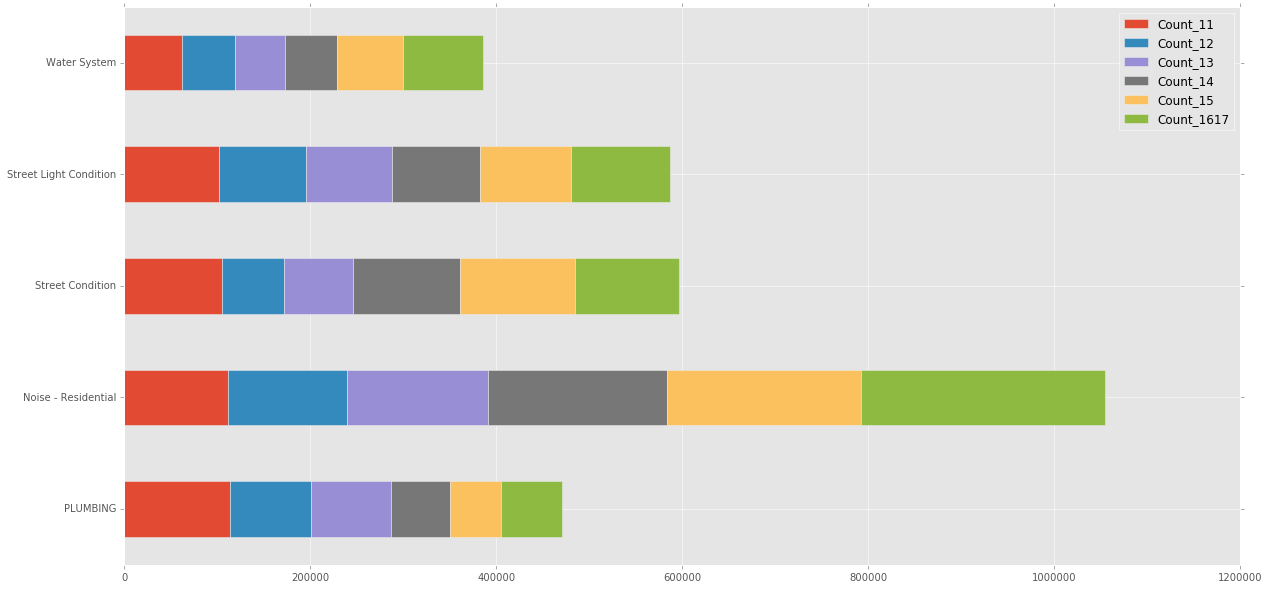

In [554]:
total_data_2[:5].plot(kind = 'barh', stacked = True, figsize = (20,10), label = lables_5[0])
plt.yticks(range(5),lables_5[0])
plt.show()

In [556]:
lables_10 = [total_data_2['Complaint Type'][:10]]
lables_10

[0                    PLUMBING
 1         Noise - Residential
 2            Street Condition
 3      Street Light Condition
 4                Water System
 5            Blocked Driveway
 6    Traffic Signal Condition
 7                       Sewer
 8                    ELECTRIC
 9            Dirty Conditions
 Name: Complaint Type, dtype: object]

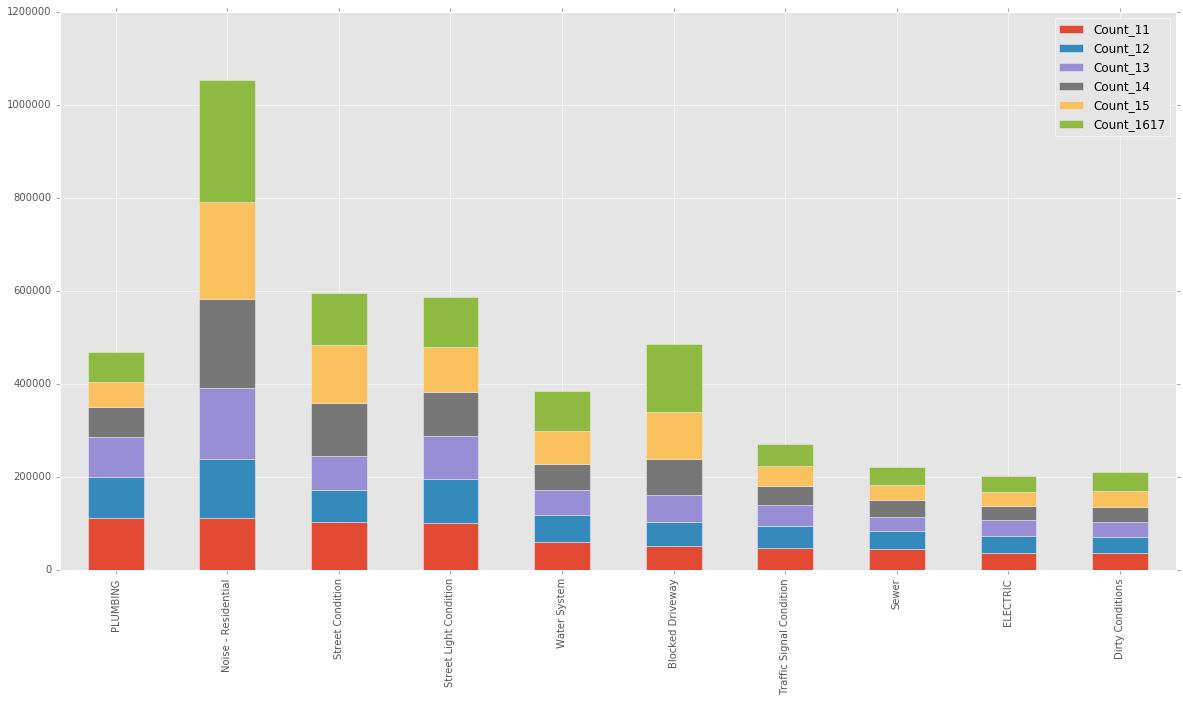

In [558]:
total_data_2[:10].plot(kind = 'bar', stacked = True, figsize = (20,10), label = lables_5[0])
plt.xticks(range(10),lables_10[0])
plt.show()

In [559]:
lables_15 = [total_data_2['Complaint Type'][:15]]
lables_15

[0                          PLUMBING
 1               Noise - Residential
 2                  Street Condition
 3            Street Light Condition
 4                      Water System
 5                  Blocked Driveway
 6          Traffic Signal Condition
 7                             Sewer
 8                          ELECTRIC
 9                  Dirty Conditions
 10                  Illegal Parking
 11                     Damaged Tree
 12                            Noise
 13                     Building/Use
 14    General Construction/Plumbing
 Name: Complaint Type, dtype: object]

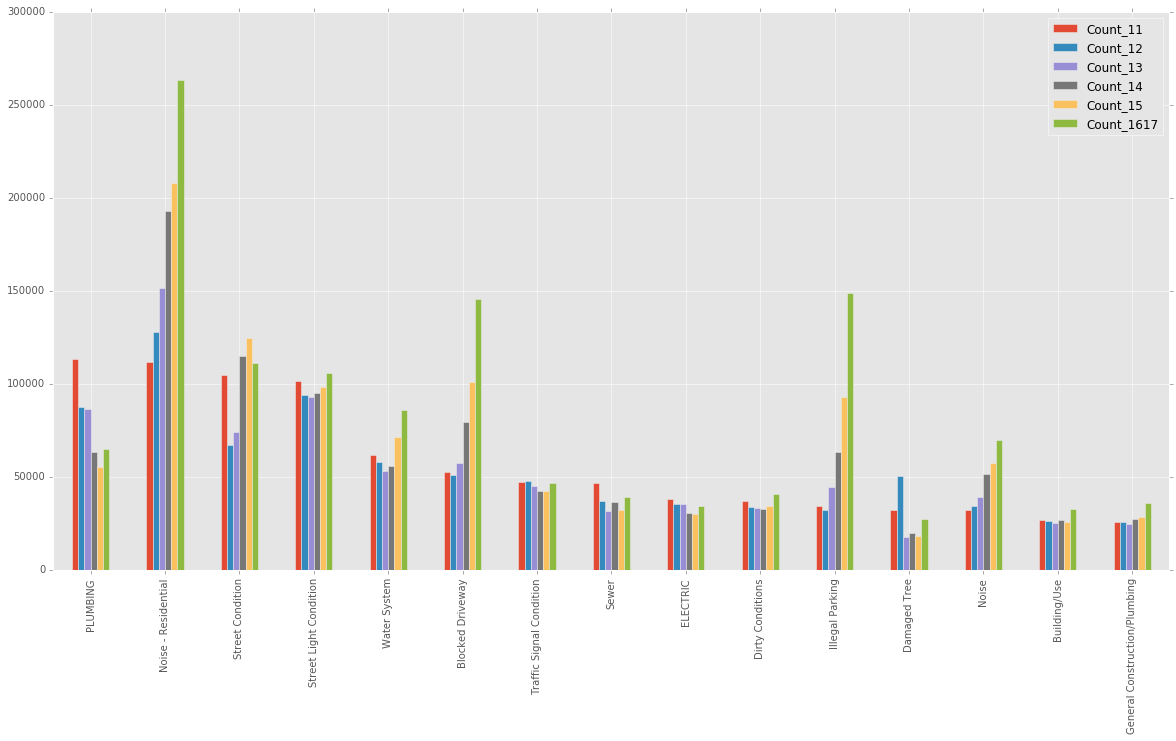

In [560]:
total_data_2[:15].plot(kind = 'bar', figsize = (20,10), label = lables_5[0])
plt.xticks(range(15),lables_15[0])
plt.show()

In [561]:
lables_20 = [total_data_2['Complaint Type'][:20]]
lables_20

[0                              PLUMBING
 1                   Noise - Residential
 2                      Street Condition
 3                Street Light Condition
 4                          Water System
 5                      Blocked Driveway
 6              Traffic Signal Condition
 7                                 Sewer
 8                              ELECTRIC
 9                      Dirty Conditions
 10                      Illegal Parking
 11                         Damaged Tree
 12                                Noise
 13                         Building/Use
 14        General Construction/Plumbing
 15                 Sanitation Condition
 16                               Rodent
 17                       Taxi Complaint
 18    Missed Collection (All Materials)
 19                   Noise - Commercial
 Name: Complaint Type, dtype: object]

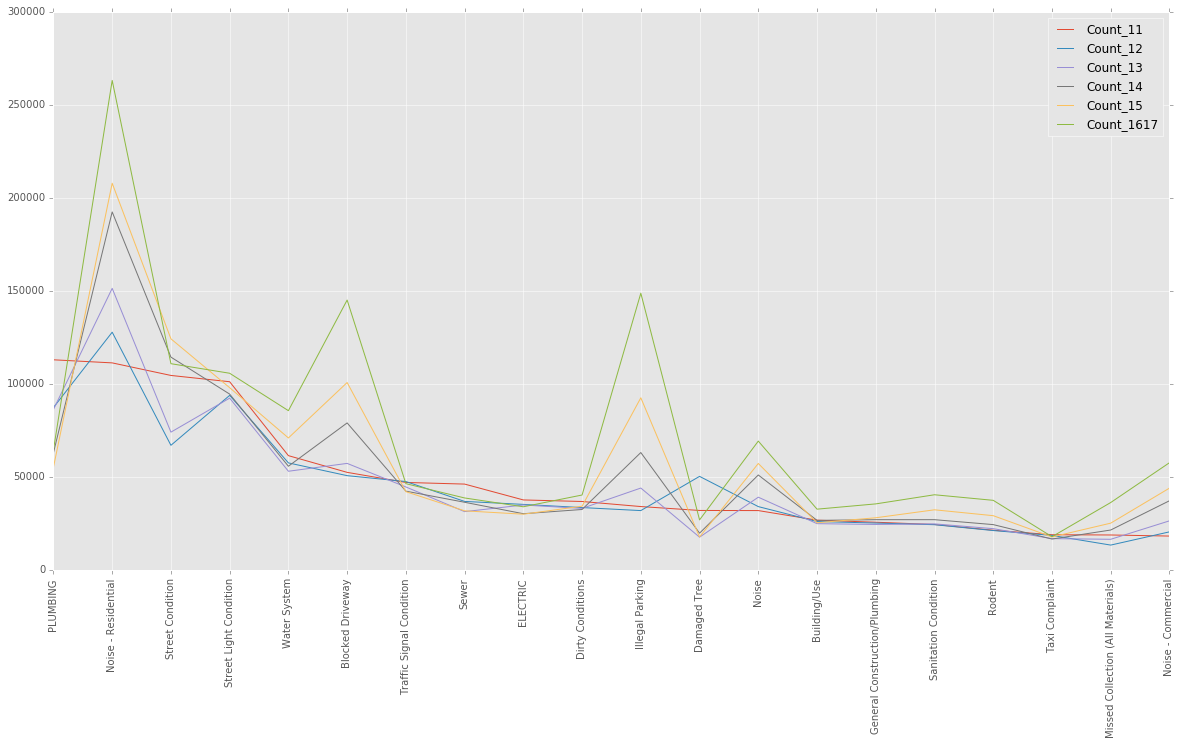

In [564]:
total_data_2[:20].plot(kind = 'line', figsize = (20,10), label = lables_20[0])
plt.xticks(range(20),lables_20[0], rotation = 'vertical')
plt.show()

In [407]:
link_data

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617
0,Noise - Residential,22411,23776,31140,38239,38982,47285
1,Street Condition,22114,14497,12438,19732,20380,19053
2,PLUMBING,19003,14963,15023,12581,11971,13546
3,Broken Muni Meter,17452,16513,32959,27760,15362,19631
4,Noise,16531,16202,18562,25068,25575,36361
5,Taxi Complaint,15002,15618,13812,12619,12041,12271
6,Water System,8794,9284,9857,10276,12019,13924
7,Noise - Commercial,8732,10412,13192,20951,24330,30777
8,Noise - Street/Sidewalk,7538,8297,10745,13472,19639,26896
9,Consumer Complaint,7422,7817,8127,7562,7273,7903


In [565]:
link_data_2 = link_data.drop(['%1112', '%1213', '%1314', '%1415', '%1516'], axis = 1)

In [566]:
llables_5 = [link_data_2['Complaint Type'][:5]]
llables_5

[0    Noise - Residential
 1       Street Condition
 2               PLUMBING
 3      Broken Muni Meter
 4                  Noise
 Name: Complaint Type, dtype: object]

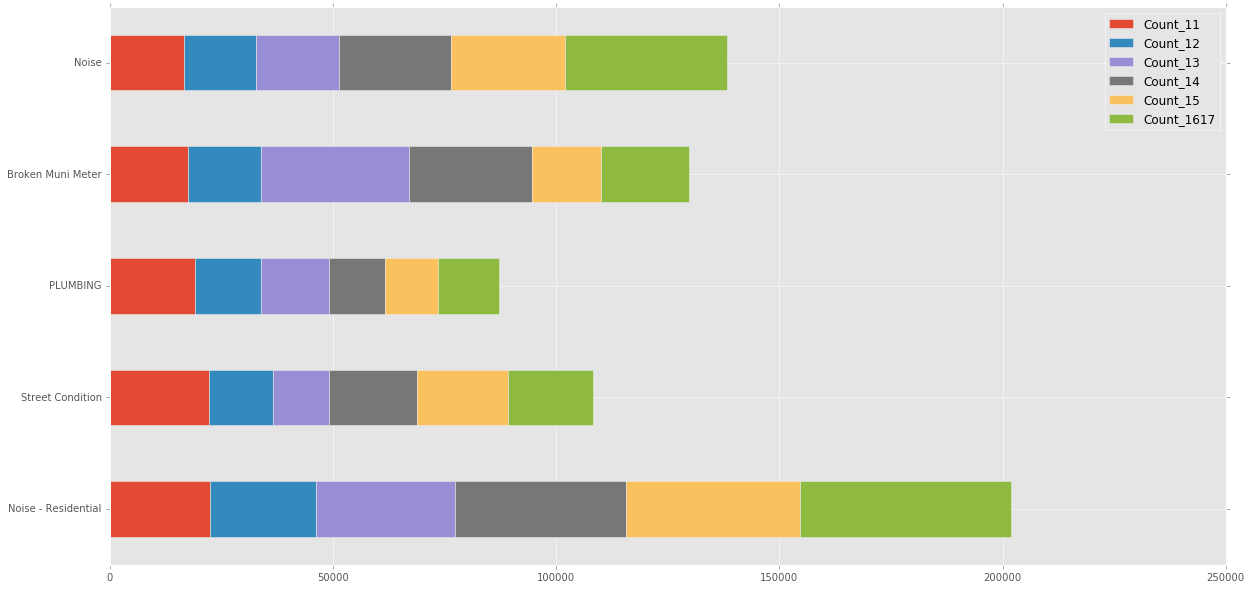

In [567]:
link_data_2[:5].plot(kind = 'barh', stacked = True, figsize = (20,10), label = llables_5[0])
plt.yticks(range(5),llables_5[0])
plt.show()

In [568]:
llables_10 = [link_data_2['Complaint Type'][:10]]
llables_10

[0        Noise - Residential
 1           Street Condition
 2                   PLUMBING
 3          Broken Muni Meter
 4                      Noise
 5             Taxi Complaint
 6               Water System
 7         Noise - Commercial
 8    Noise - Street/Sidewalk
 9         Consumer Complaint
 Name: Complaint Type, dtype: object]

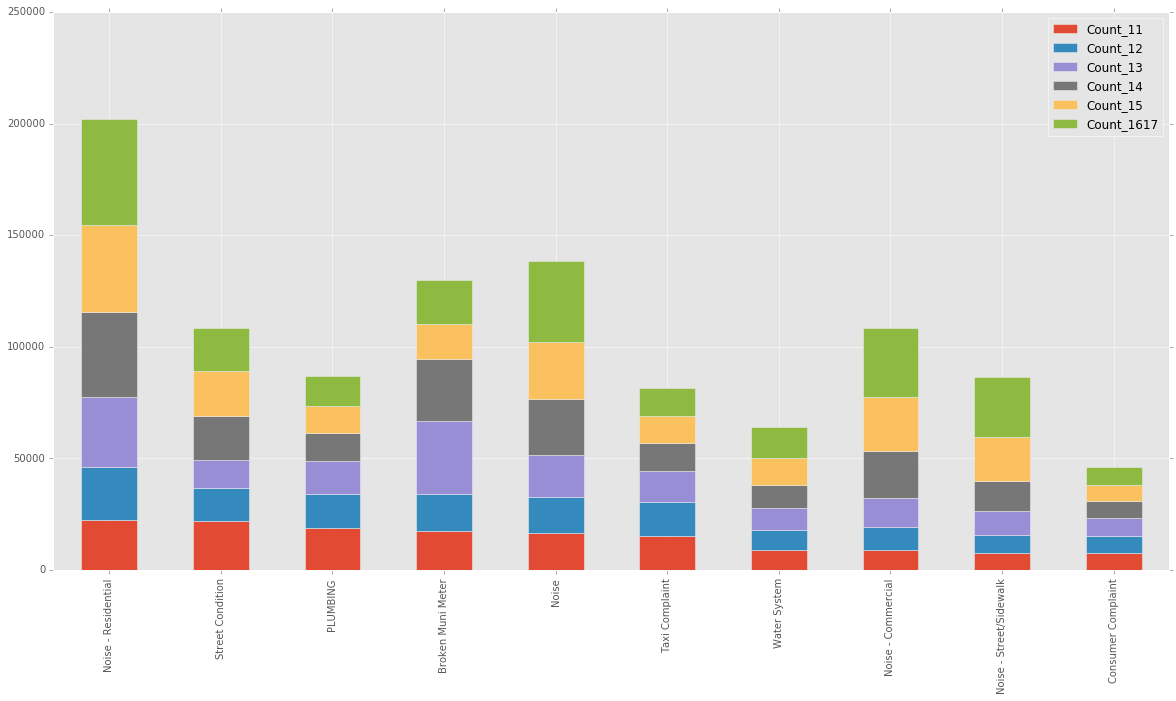

In [571]:
link_data_2[:10].plot(kind = 'bar', stacked = True, figsize = (20,10), label = llables_10[0])
plt.xticks(range(10),llables_10[0])
plt.show()

In [573]:
llables_15 = [link_data_2['Complaint Type'][:15]]
llables_15

[0               Noise - Residential
 1                  Street Condition
 2                          PLUMBING
 3                 Broken Muni Meter
 4                             Noise
 5                    Taxi Complaint
 6                      Water System
 7                Noise - Commercial
 8           Noise - Street/Sidewalk
 9                Consumer Complaint
 10                  Illegal Parking
 11    General Construction/Plumbing
 12                         ELECTRIC
 13                 Dirty Conditions
 14                            Sewer
 Name: Complaint Type, dtype: object]

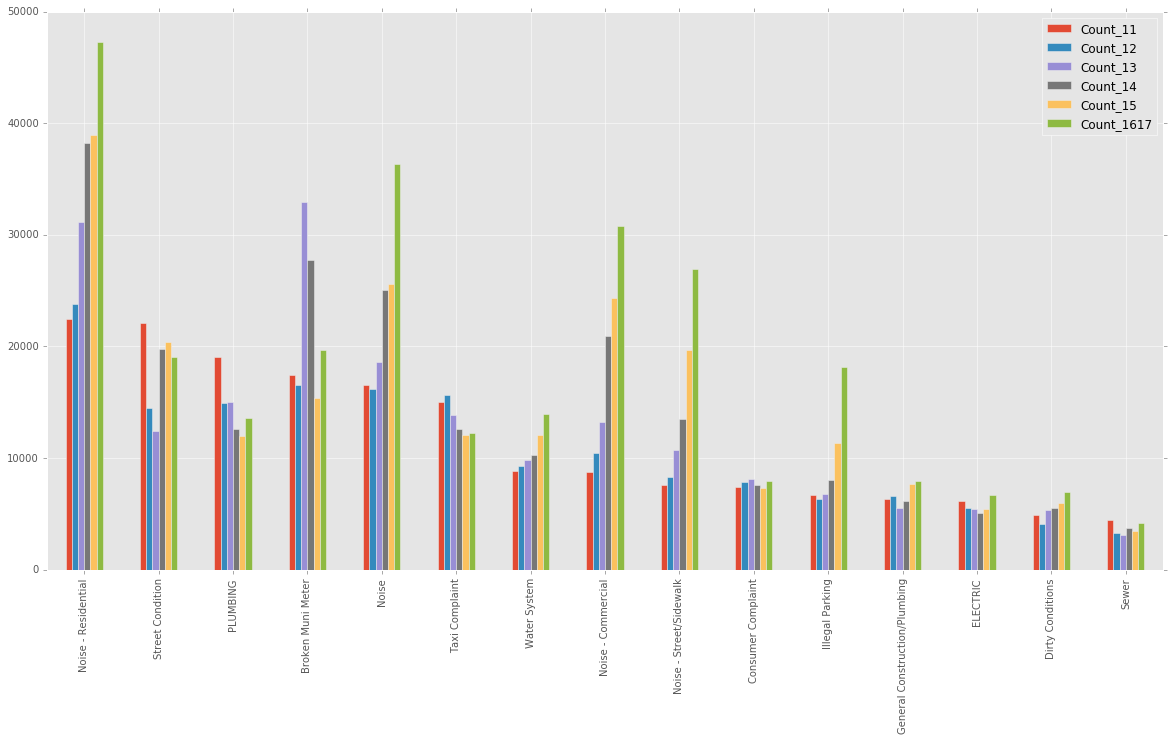

In [575]:
link_data_2[:15].plot(kind = 'bar', figsize = (20,10), label = llables_15[0])
plt.xticks(range(15),llables_15[0])
plt.show()

In [572]:
llables_20 = [link_data_2['Complaint Type'][:20]]
llables_20

[0               Noise - Residential
 1                  Street Condition
 2                          PLUMBING
 3                 Broken Muni Meter
 4                             Noise
 5                    Taxi Complaint
 6                      Water System
 7                Noise - Commercial
 8           Noise - Street/Sidewalk
 9                Consumer Complaint
 10                  Illegal Parking
 11    General Construction/Plumbing
 12                         ELECTRIC
 13                 Dirty Conditions
 14                            Sewer
 15                           Rodent
 16                      Air Quality
 17                  Noise - Vehicle
 18                         Graffiti
 19                          Vending
 Name: Complaint Type, dtype: object]

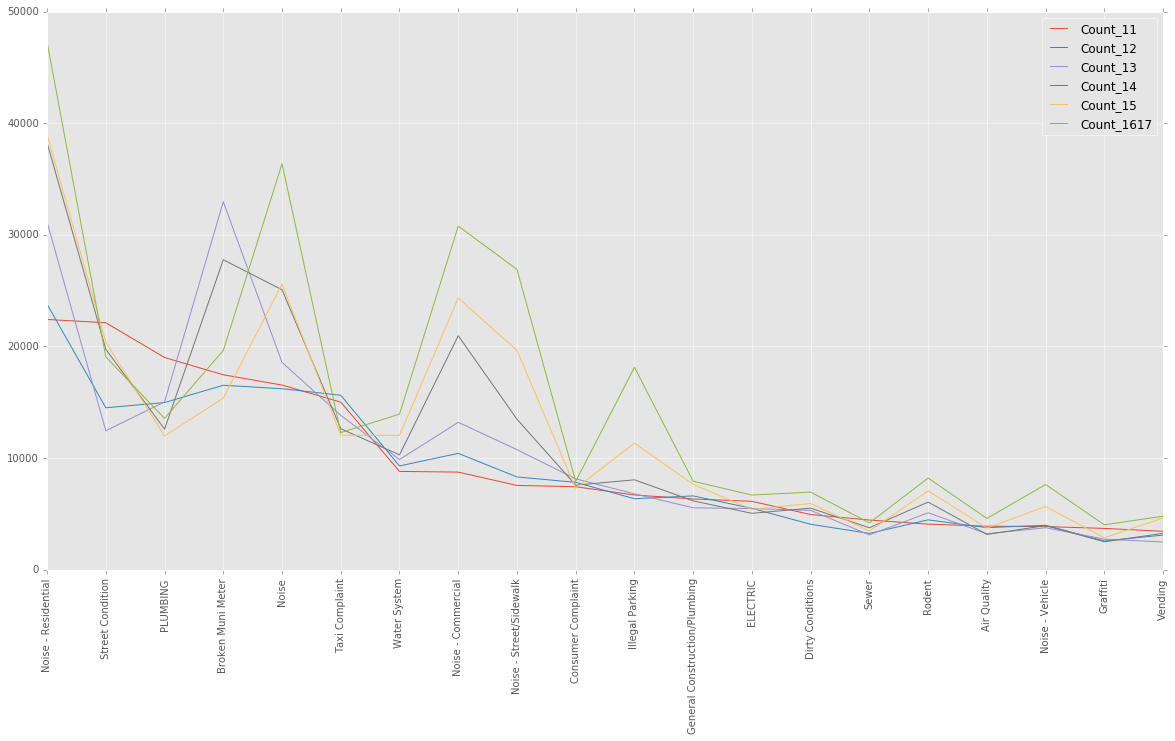

In [576]:
link_data_2[:20].plot(kind = 'line', figsize = (20,10), label = llables_20[0])
plt.xticks(range(20),llables_20[0], rotation = 'vertical')
plt.show()

#### Finding and Showing the Differences between Control and Sample Space
#### Showing the %age increase as well

- Total - Data

In [454]:
total_data['%1112'] = ((total_data['Count_12'] - total_data['Count_11'])/total_data['Count_11'])*100
total_data['%1213'] = ((total_data['Count_13'] - total_data['Count_12'])/total_data['Count_12'])*100
total_data['%1314'] = ((total_data['Count_14'] - total_data['Count_13'])/total_data['Count_13'])*100
total_data['%1415'] = ((total_data['Count_15'] - total_data['Count_14'])/total_data['Count_14'])*100
total_data['%1516'] = ((total_data['Count_1617'] - total_data['Count_15'])/total_data['Count_15'])*100
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617,%1112,%1213,%1314,%1415,%1516
0,PLUMBING,113105,87448,86404,63125,55345,64682,-22.684231,-1.193852,-26.942040,-12.324752,16.870539
1,Noise - Residential,111447,127943,151516,192608,208026,263301,14.801655,18.424611,27.120568,8.004860,26.571198
2,Street Condition,104694,67135,74213,114545,124379,111015,-35.875026,10.542936,54.346274,8.585272,-10.744579
3,Street Light Condition,101314,93981,92502,94665,98106,105870,-7.237894,-1.573722,2.338328,3.634923,7.913889
4,Water System,61577,57678,53185,55883,71085,85753,-6.331910,-7.789799,5.072859,27.203264,20.634452


In [461]:
total_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617,%1112,%1213,%1314,%1415,%1516
0,PLUMBING,113105,87448,86404,63125,55345,64682,-22.684231,-1.193852,-26.942040,-12.324752,16.870539
1,Noise - Residential,111447,127943,151516,192608,208026,263301,14.801655,18.424611,27.120568,8.004860,26.571198
2,Street Condition,104694,67135,74213,114545,124379,111015,-35.875026,10.542936,54.346274,8.585272,-10.744579
3,Street Light Condition,101314,93981,92502,94665,98106,105870,-7.237894,-1.573722,2.338328,3.634923,7.913889
4,Water System,61577,57678,53185,55883,71085,85753,-6.331910,-7.789799,5.072859,27.203264,20.634452


In [459]:
total_change = total_data.drop([u'Count_11', u'Count_12', u'Count_13', u'Count_14', u'Count_15', u'Count_1617'], axis = 1)
total_change.head()

,Complaint Type,%1112,%1213,%1314,%1415,%1516
0,PLUMBING,-22.684231,-1.193852,-26.942040,-12.324752,16.870539
1,Noise - Residential,14.801655,18.424611,27.120568,8.004860,26.571198
2,Street Condition,-35.875026,10.542936,54.346274,8.585272,-10.744579
3,Street Light Condition,-7.237894,-1.573722,2.338328,3.634923,7.913889
4,Water System,-6.331910,-7.789799,5.072859,27.203264,20.634452


In [577]:
clables_5 = [total_change['Complaint Type'][:5]]
clables_5

[0                  PLUMBING
 1       Noise - Residential
 2          Street Condition
 3    Street Light Condition
 4              Water System
 Name: Complaint Type, dtype: object]

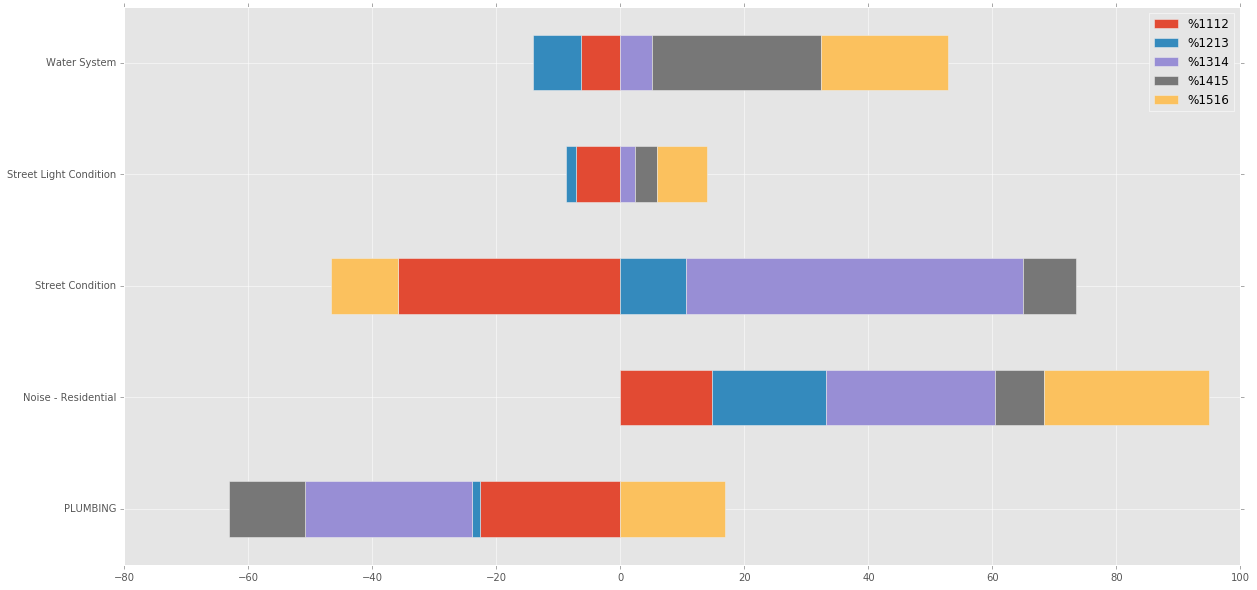

In [578]:
total_change[:5].plot(kind = 'barh', stacked = True, figsize = (20,10), label = clables_5[0])
plt.yticks(range(5),clables_5[0])
plt.show()

In [579]:
clables_10 = [total_change['Complaint Type'][:10]]
clables_10

[0                    PLUMBING
 1         Noise - Residential
 2            Street Condition
 3      Street Light Condition
 4                Water System
 5            Blocked Driveway
 6    Traffic Signal Condition
 7                       Sewer
 8                    ELECTRIC
 9            Dirty Conditions
 Name: Complaint Type, dtype: object]

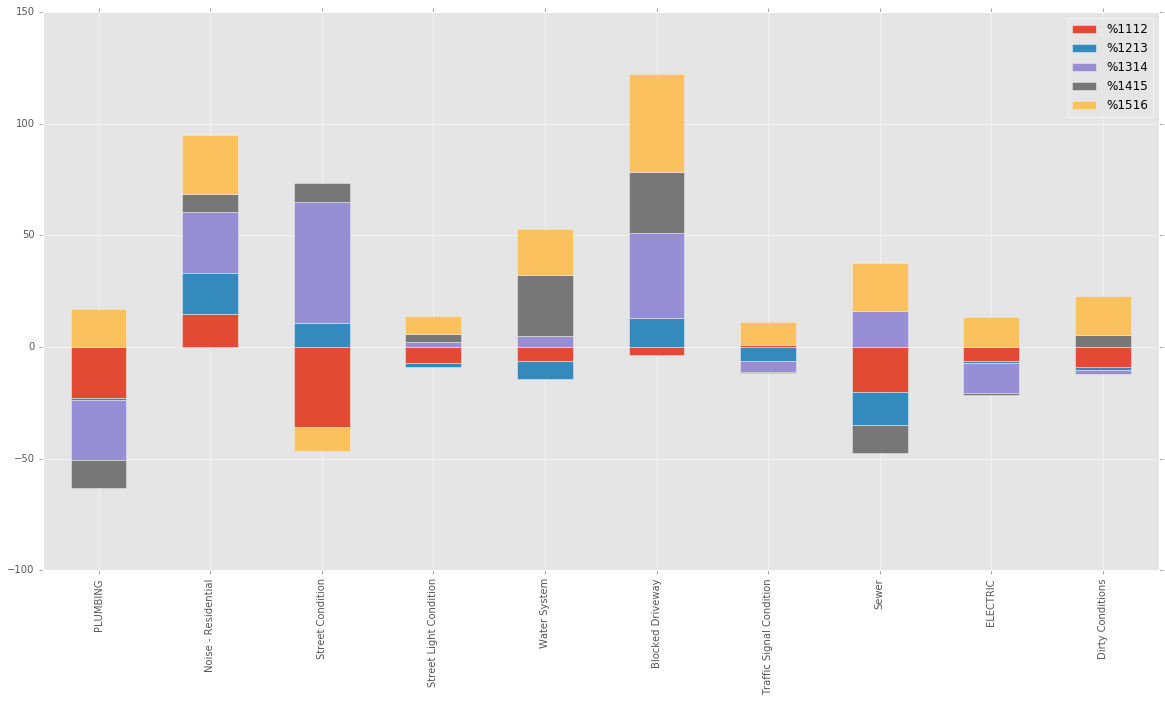

In [580]:
total_change[:10].plot(kind = 'bar', stacked = True, figsize = (20,10), label = clables_10[0])
plt.xticks(range(10),clables_10[0])
plt.show()

In [581]:
clables_15 = [total_change['Complaint Type'][:15]]
clables_15

[0                          PLUMBING
 1               Noise - Residential
 2                  Street Condition
 3            Street Light Condition
 4                      Water System
 5                  Blocked Driveway
 6          Traffic Signal Condition
 7                             Sewer
 8                          ELECTRIC
 9                  Dirty Conditions
 10                  Illegal Parking
 11                     Damaged Tree
 12                            Noise
 13                     Building/Use
 14    General Construction/Plumbing
 Name: Complaint Type, dtype: object]

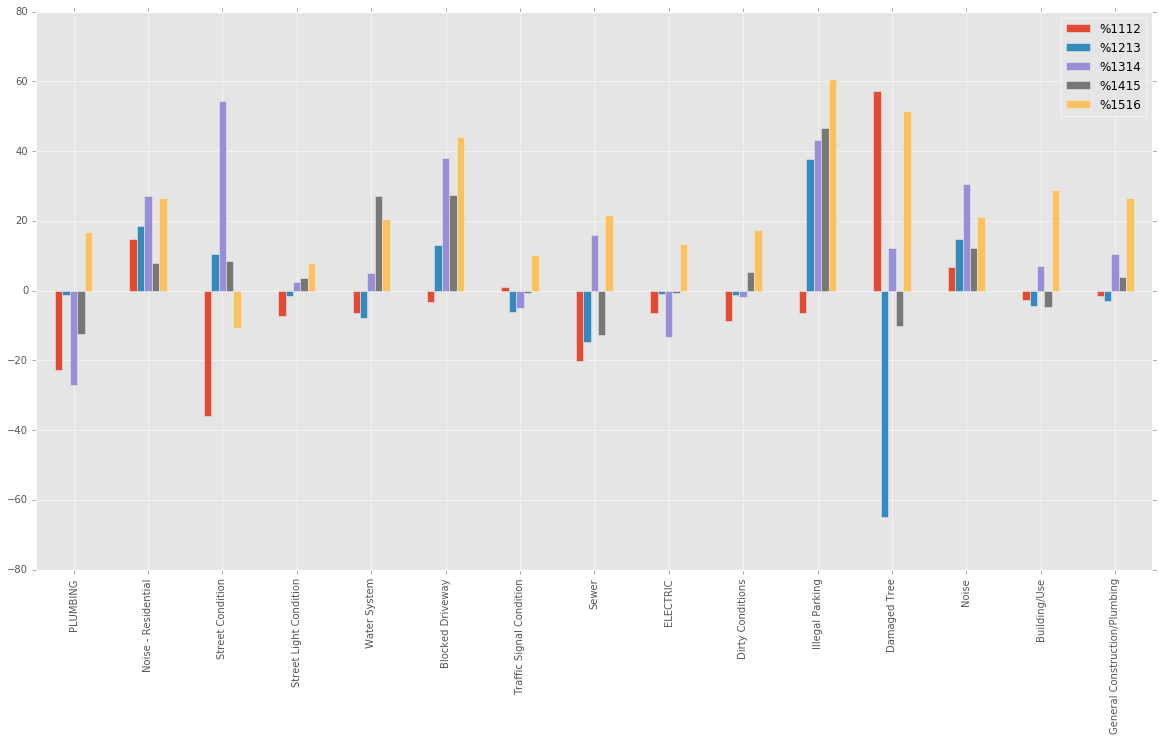

In [582]:
total_change[:15].plot(kind = 'bar', figsize = (20,10), label = clables_15[0])
plt.xticks(range(15),clables_15[0])
plt.show()

In [583]:
clables_20 = [total_change['Complaint Type'][:20]]
clables_20

[0                              PLUMBING
 1                   Noise - Residential
 2                      Street Condition
 3                Street Light Condition
 4                          Water System
 5                      Blocked Driveway
 6              Traffic Signal Condition
 7                                 Sewer
 8                              ELECTRIC
 9                      Dirty Conditions
 10                      Illegal Parking
 11                         Damaged Tree
 12                                Noise
 13                         Building/Use
 14        General Construction/Plumbing
 15                 Sanitation Condition
 16                               Rodent
 17                       Taxi Complaint
 18    Missed Collection (All Materials)
 19                   Noise - Commercial
 Name: Complaint Type, dtype: object]

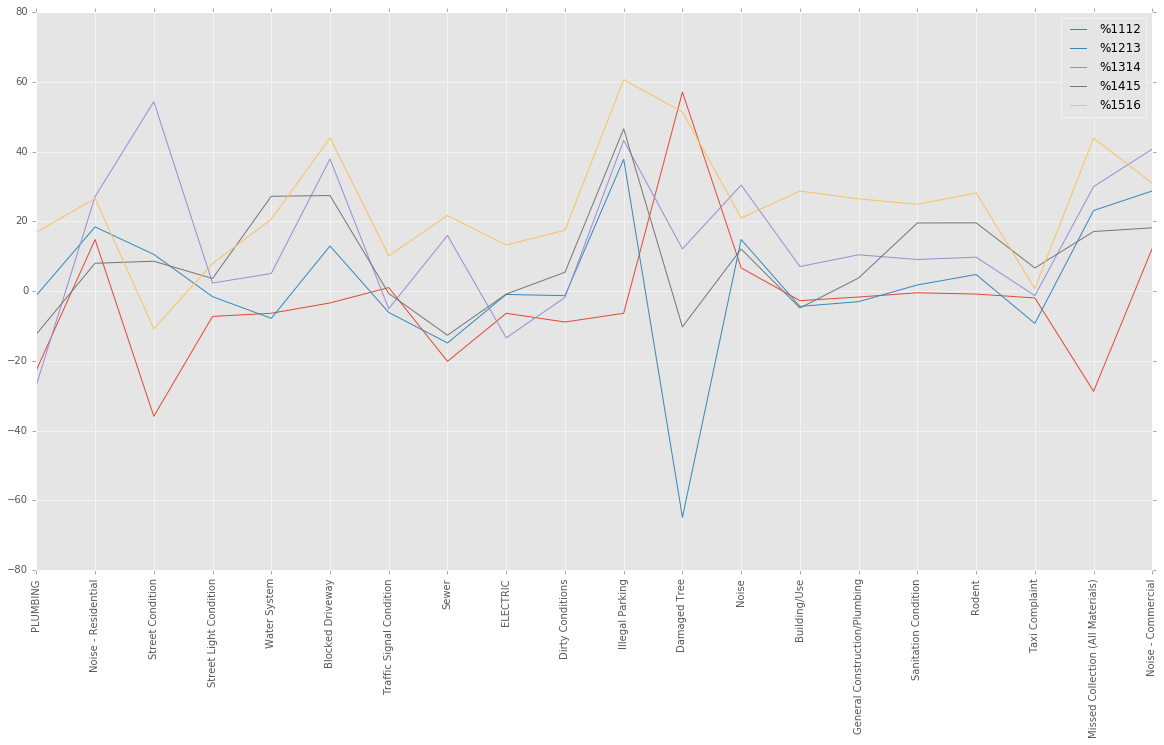

In [584]:
total_change[:20].plot(kind = 'line', figsize = (20,10), label = clables_20[0])
plt.xticks(range(20),clables_20[0], rotation = 'vertical')
plt.show()

- Link - Data

In [455]:
link_data['%1112'] = ((link_data['Count_12'] - link_data['Count_11'])/link_data['Count_11'])*100
link_data['%1213'] = ((link_data['Count_13'] - link_data['Count_12'])/link_data['Count_12'])*100
link_data['%1314'] = ((link_data['Count_14'] - link_data['Count_13'])/link_data['Count_13'])*100
link_data['%1415'] = ((link_data['Count_15'] - link_data['Count_14'])/link_data['Count_14'])*100
link_data['%1516'] = ((link_data['Count_1617'] - link_data['Count_15'])/link_data['Count_15'])*100
link_data.head()

,Complaint Type,Count_11,Count_12,Count_13,Count_14,Count_15,Count_1617,%1112,%1213,%1314,%1415,%1516
0,Noise - Residential,22411,23776,31140,38239,38982,47285,6.090759,30.972409,22.797046,1.943042,21.299574
1,Street Condition,22114,14497,12438,19732,20380,19053,-34.444243,-14.202939,58.642869,3.284006,-6.511286
2,PLUMBING,19003,14963,15023,12581,11971,13546,-21.259801,0.400989,-16.255076,-4.848581,13.156796
3,Broken Muni Meter,17452,16513,32959,27760,15362,19631,-5.380472,99.594259,-15.774144,-44.661383,27.789350
4,Noise,16531,16202,18562,25068,25575,36361,-1.990200,14.566103,35.050102,2.022499,42.173998


In [477]:
link_data.columns

Index([u'Complaint Type', u'Count_11', u'Count_12', u'Count_13', u'Count_14',
       u'Count_15', u'Count_1617', u'%1112', u'%1213', u'%1314', u'%1415',
       u'%1516'],
      dtype='object')

In [479]:
link_change = link_data.drop([u'Count_11', u'Count_12', u'Count_13', u'Count_14', u'Count_15', u'Count_1617'], axis = 1)
link_change.head()

,Complaint Type,%1112,%1213,%1314,%1415,%1516
0,Noise - Residential,6.090759,30.972409,22.797046,1.943042,21.299574
1,Street Condition,-34.444243,-14.202939,58.642869,3.284006,-6.511286
2,PLUMBING,-21.259801,0.400989,-16.255076,-4.848581,13.156796
3,Broken Muni Meter,-5.380472,99.594259,-15.774144,-44.661383,27.789350
4,Noise,-1.990200,14.566103,35.050102,2.022499,42.173998


In [585]:
cllables_5 = [link_change['Complaint Type'][:5]]
cllables_5

[0    Noise - Residential
 1       Street Condition
 2               PLUMBING
 3      Broken Muni Meter
 4                  Noise
 Name: Complaint Type, dtype: object]

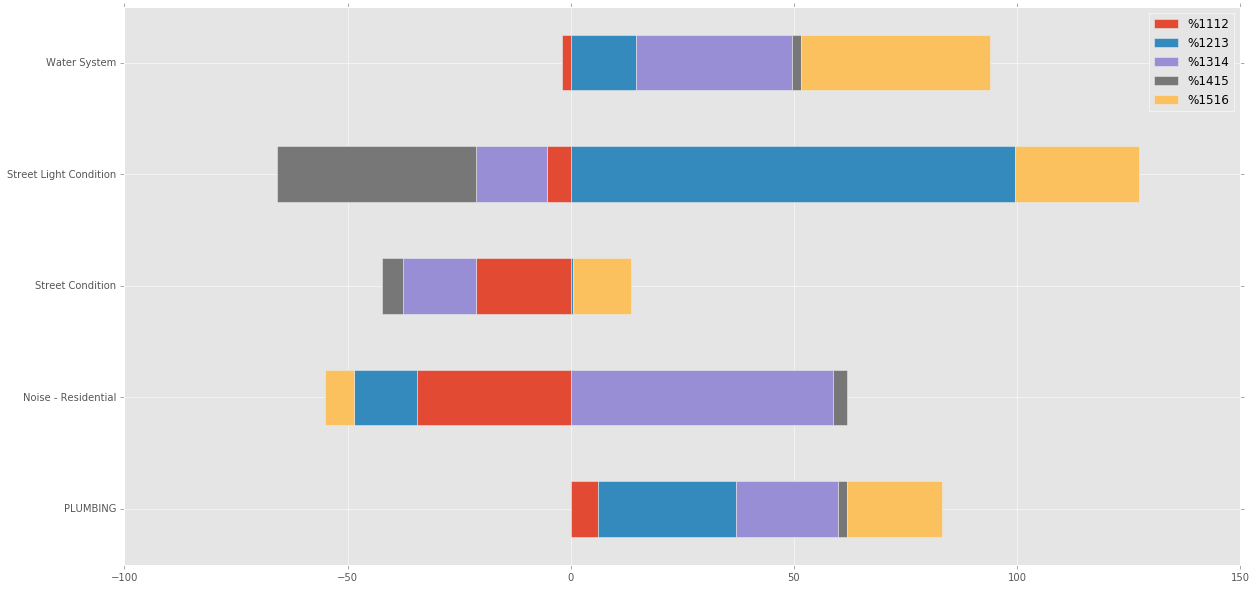

In [586]:
link_change[:5].plot(kind = 'barh', stacked = True, figsize = (20,10), label = cllables_5[0])
plt.yticks(range(5),clables_5[0])
plt.show()

In [587]:
cllables_10 = [link_change['Complaint Type'][:10]]
cllables_10

[0        Noise - Residential
 1           Street Condition
 2                   PLUMBING
 3          Broken Muni Meter
 4                      Noise
 5             Taxi Complaint
 6               Water System
 7         Noise - Commercial
 8    Noise - Street/Sidewalk
 9         Consumer Complaint
 Name: Complaint Type, dtype: object]

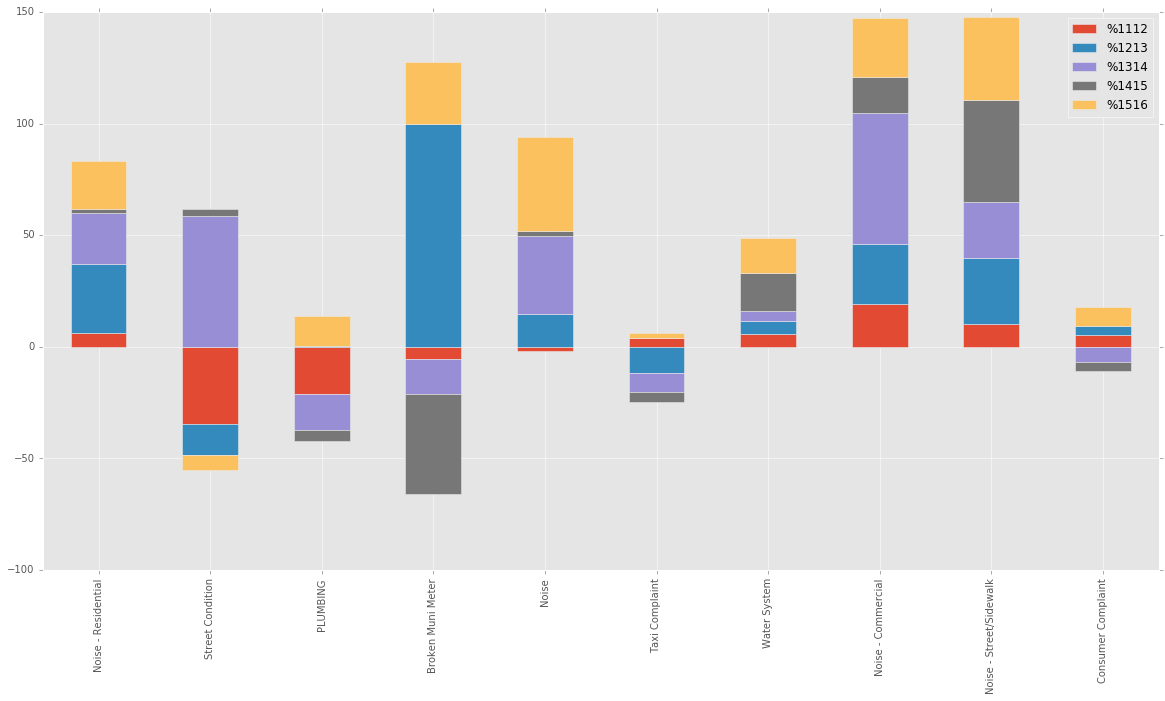

In [588]:
link_change[:10].plot(kind = 'bar', stacked = True, figsize = (20,10), label = cllables_10[0])
plt.xticks(range(10),cllables_10[0])
plt.show()

In [589]:
cllables_15 = [link_change['Complaint Type'][:15]]
cllables_15

[0               Noise - Residential
 1                  Street Condition
 2                          PLUMBING
 3                 Broken Muni Meter
 4                             Noise
 5                    Taxi Complaint
 6                      Water System
 7                Noise - Commercial
 8           Noise - Street/Sidewalk
 9                Consumer Complaint
 10                  Illegal Parking
 11    General Construction/Plumbing
 12                         ELECTRIC
 13                 Dirty Conditions
 14                            Sewer
 Name: Complaint Type, dtype: object]

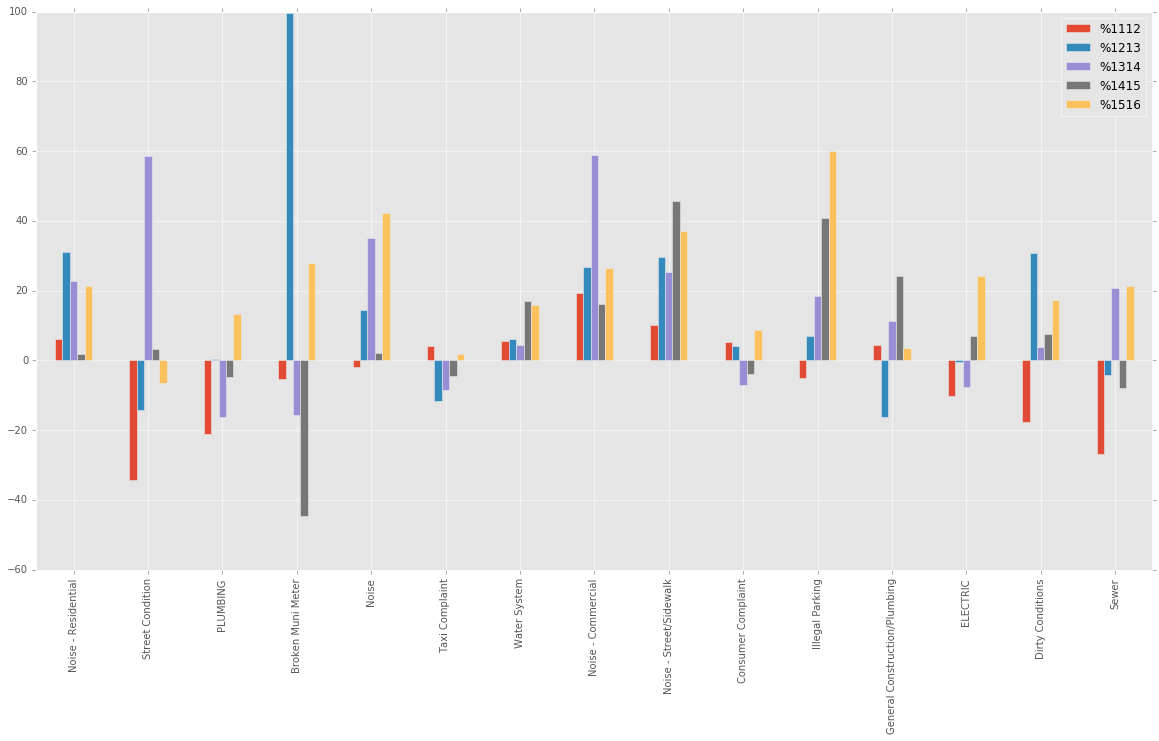

In [590]:
link_change[:15].plot(kind = 'bar', figsize = (20,10), label = cllables_15[0])
plt.xticks(range(15),cllables_15[0], rotation = 'vertical')
plt.show()

In [591]:
cllables_20 = [link_change['Complaint Type'][:20]]
cllables_20

[0               Noise - Residential
 1                  Street Condition
 2                          PLUMBING
 3                 Broken Muni Meter
 4                             Noise
 5                    Taxi Complaint
 6                      Water System
 7                Noise - Commercial
 8           Noise - Street/Sidewalk
 9                Consumer Complaint
 10                  Illegal Parking
 11    General Construction/Plumbing
 12                         ELECTRIC
 13                 Dirty Conditions
 14                            Sewer
 15                           Rodent
 16                      Air Quality
 17                  Noise - Vehicle
 18                         Graffiti
 19                          Vending
 Name: Complaint Type, dtype: object]

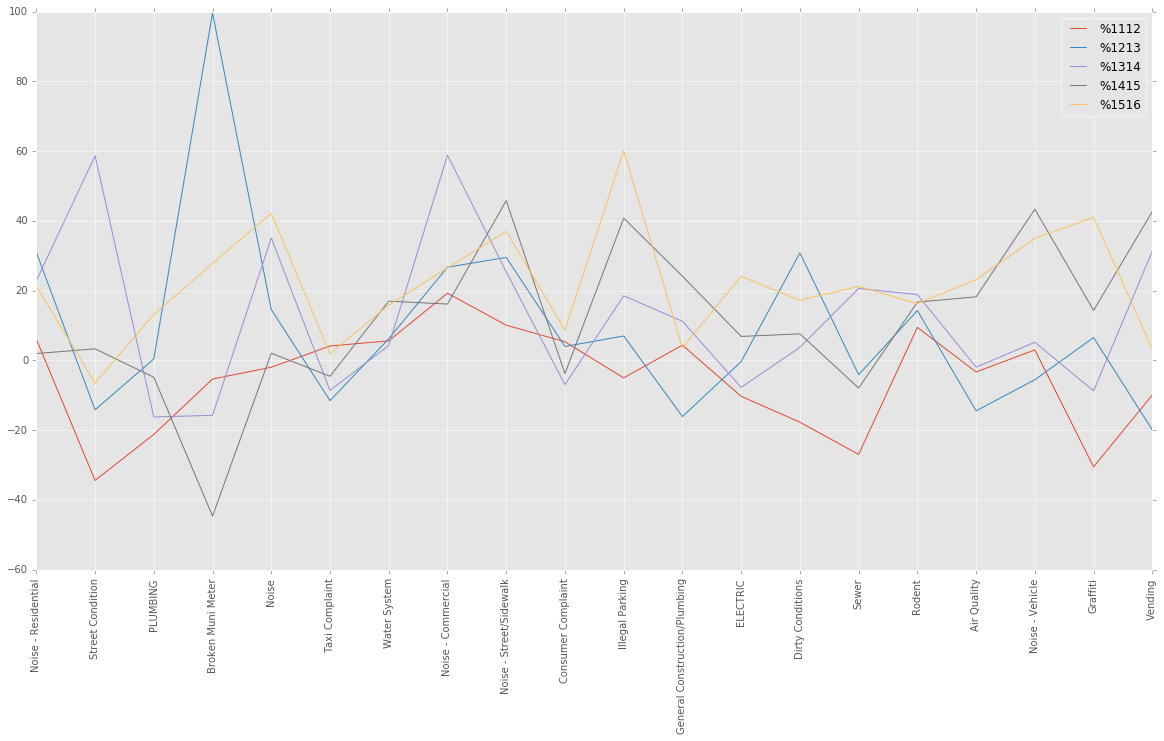

In [592]:
link_change[:20].plot(kind = 'line', figsize = (20,10), label = cllables_20[0])
plt.xticks(range(20),cllables_20[0], rotation = 'vertical')
plt.show()